---
# IMPORTANT CHANGE THIS VARIABLE TO TRUE TO RUN THE EXPERIMENTS IN THIS NOTE BOOK

In [1]:
RUN_EXPERIMENTS = False

---

In [2]:
import numpy as np
import nnfs 
nnfs.init()

# Section 1

## Without numpy

### A single neuron 

#### Initialize

In [3]:
#Let's initialize for one input
inputs = [1, 2, 3]
weights = [0.2 ,0.8, -0.5]
bias = 2

#### Get the outputs

 - What we want is to multiply each corresponding input by each weights and then add the bias to it. Let's first do it by hand and crate a reusable function


In [4]:
output = (inputs[0] * weights[0] + 
          inputs[1] * weights[1] + 
          inputs[2] * weights[2] +
          bias )
print(output)

2.3


In [5]:
#create a reusable output function 
def out(inputs, weights, bias):
    sum = bias
    for i in range(len(inputs)):
        sum += weights[i] * inputs[i]
    return sum

In [6]:
out(inputs, weights, bias)

2.3000000000000003

In [7]:
# add another input and weight and check results
inputs.append(2.5)
weights.append(1)
out(inputs, weights, bias)

4.800000000000001

### A layer of neurons

#### Initialize

In [8]:
#Let's add two more neurons two the currently available neuron
weights1 = weights
weights2 = [0.5, -0.91, 0.26, -0.5]
weights3 = [-0.26, -0.27, 0.17, 0.87]

bias1 = bias
bias2 = 3
bias3 = 0.5

#### Get the outputs

In [9]:
#Let's do it by hand first
outputs = [
    inputs[0] * weights1[0] + inputs[1] * weights1[1] + inputs[2] * weights1[2] + inputs[3] * weights1[3] + bias1,
    inputs[0] * weights2[0] + inputs[1] * weights2[1] + inputs[2] * weights2[2] + inputs[3] * weights2[3] + bias2,
    inputs[0] * weights3[0] + inputs[1] * weights3[1] + inputs[2] * weights3[2] + inputs[3] * weights3[3] + bias3,
    ]
outputs

[4.8, 1.21, 2.385]

#### Nesting the weights and biases

As doing this by hand get's very long let's list the weights and biases together for the whole layer

In [10]:
weights = [weights1,
           weights2,
           weights3]
biases = [bias1, bias2, bias3]
print(*weights, biases, sep='\n')

[0.2, 0.8, -0.5, 1]
[0.5, -0.91, 0.26, -0.5]
[-0.26, -0.27, 0.17, 0.87]
[2, 3, 0.5]


#### Creating a loop to do the whole sum in one go

In [11]:
def layer_sum(inputs, weights, biases):
    layer_outputs = []

    #Go through each neuron
    for neuron_weights, neuron_bias in zip(weights,biases):
        neuron_sum = 0

        #go through each input and corresponding weight
        for weight, input in zip(neuron_weights, inputs):
            neuron_sum += weight * input

        neuron_sum += neuron_bias
        #you can replace the whole inner loop and sums with the function we created earlier `out()`

        layer_outputs.append(neuron_sum)
    
    return layer_outputs

layer_sum(inputs,weights,biases)

[4.8, 1.21, 2.385]

## With numpy

- Let's implement the above steps with numpy and see the ease of use

### A single neuron

#### Initialize

In [12]:
inputs = [1.0, 2.0, 3.0, 2.5]
weights = [0.2, 0.8, -0.5, 1.0]
bias  = 2.0

#### Output using `np.dot()`

In [13]:
np.dot(np.array(inputs), np.array(weights)) + np.array(bias)

4.799999952316284

### A layer of neurons

#### Initialize as before

In [14]:
inputs = inputs
weights = [[ 0.2 , 0.8 , -0.5 , 1 ],
           [ 0.5 , -0.91 , 0.26 , -0.5 ],
           [ -0.26 , -0.27 , 0.17 , 0.87 ]]
biases = [2.0, 3.0, 0.5]

#### Get the output

In [15]:
layer_outputs = np.dot(np.array(weights), np.array(inputs)) + biases
layer_outputs

array([4.79999995, 1.21000004, 2.38499999])

### Adding the batch dimension

- Before we only looked at one sample of data but usually in any Dense layer the input samples are presented as batches for parallel processing so in this case the theorem is mostly similar but the code is slightly adjusted to fit for this need and the outputs also have a batch dimension.

#### Initialize

In [16]:
inputs = [[ 1.0 , 2.0 , 3.0 , 2.5 ],
[ 2.0 , 5.0 , - 1.0 , 2.0 ],
[ - 1.5 , 2.7 , 3.3 , - 0.8 ]]
weights = [[ 0.2 , 0.8 , - 0.5 , 1.0 ],
[ 0.5 , - 0.91 , 0.26 , - 0.5 ],
[ - 0.26 , - 0.27 , 0.17 , 0.87 ]]
biases = [ 2.0 , 3.0 , 0.5 ]

#### Get outputs

In [17]:
layer_outputs = np.dot(np.array(inputs), np.array(weights).T) + np.array(biases)
layer_outputs

array([[ 4.79999995,  1.21000004,  2.38499999],
       [ 8.9000001 , -1.80999994,  0.19999999],
       [ 1.41000003,  1.051     ,  0.02599999]])

### Adding another layer

#### Initialize the weights and biases
- the number of weights per neuron must match the number of outputs from the last layer

In [18]:
weights2 = [[ 0.1 , - 0.14 , 0.5 ],
[ - 0.5 , 0.12 , - 0.33 ],
[ - 0.44 , 0.73 , - 0.13 ]]
biases2 = [ - 1 , 2 , - 0.5 ]

#### Pass the inputs through both layers

In [19]:
layer1_outputs = np.dot(np.array(inputs), np.array(weights).T) + biases
layer2_outputs = np.dot(layer1_outputs, np.array(weights2).T) + biases2
layer2_outputs

array([[ 0.50310004, -1.04184985, -2.03874993],
       [ 0.24339998, -2.73320007, -5.76329994],
       [-0.99314   ,  1.41254002, -0.35655001]])

# Training data

In [20]:
import nnfs

nnfs.init()

In [21]:
from nnfs.datasets import spiral_data

In [22]:
X, y = spiral_data(samples=100, classes=3)

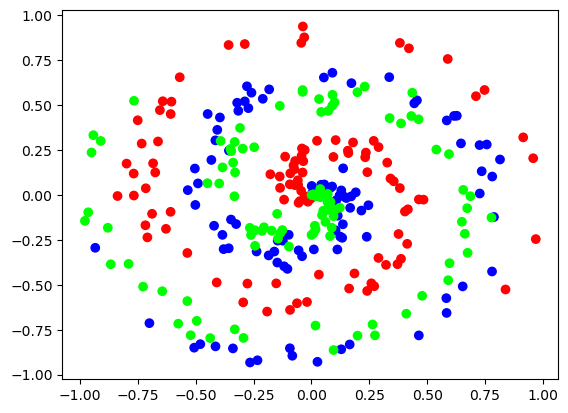

In [23]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.brg)

# Creating reusable `Dense_Layer` class

In [24]:
class Dense_Layer():

    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)#Already transposed
        self.biases = np.zeros(shape=(1, n_neurons))

    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

<a id='code_1'></a>

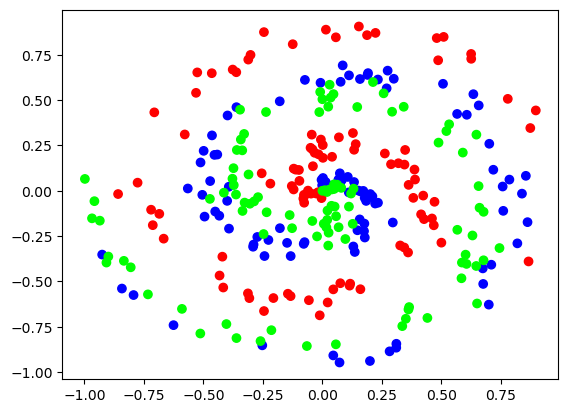

Forwarding through layer 1
Success
Shape of output : (300, 3)
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.11171044e-04 -5.11007493e-05 -1.12099799e-04]
 [ 2.99257295e-06 -2.69126613e-04 -1.45165104e-04]
 [ 8.95101766e-05 -4.30442247e-04 -1.68079801e-04]
 [-3.49893759e-04 -3.07208364e-04 -4.33002861e-04]]


In [25]:
# Check the outputs from this function
X , y = spiral_data(100, 3)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.brg)
plt.show()

layer1 = Dense_Layer(2,3)
print('Forwarding through layer 1')
layer1.forward(X) #X has two inputs
print('Success')

output_layer1 = layer1.output
print('Shape of output :', output_layer1.shape)
print(output_layer1[:5])

# Activation Functions

## Showing the importance of non-linear activation functions
- to show the importance of non-linearity lets create a linear regression model using tensorflow and try to fit the sine function

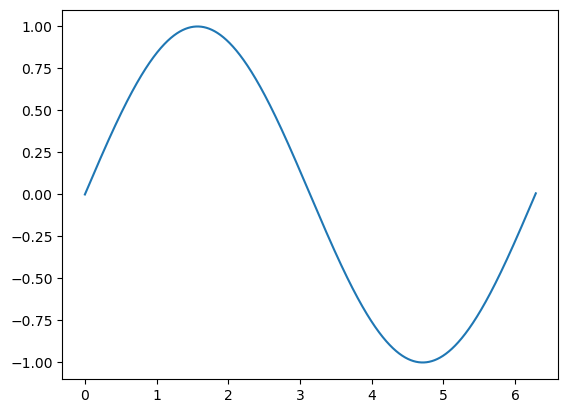

In [26]:
#Create the dataset

x_sin = np.linspace(0,6.29, 10000)
y_sin = np.sin(x_sin)
plt.plot(x_sin, y_sin)


In [27]:
# Create the model creator function 
def create_anc_compile(relu=False):
    act = 'relu' if relu else 'linear'
    import tensorflow as tf
    import keras
    model = keras.Sequential([
        tf.keras.layers.Input(shape=(1,)),
        tf.keras.layers.Dense(8, activation=act),
        tf.keras.layers.Dense(8, activation=act),
        tf.keras.layers.Dense(1, activation='linear')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')
    model.fit(x_sin, y_sin, shuffle=False, epochs=120, verbose=0)
    preds = model.predict(x_sin)
    plt.figure(figsize=(5,3))
    plt.title(f'Using {act} activation')
    plt.plot(x_sin, y_sin, c='g', label= 'truth')
    plt.plot(x_sin, preds, c='r', label='prediction')
    plt.legend()
    plt.show()

### Linear

In [28]:
if RUN_EXPERIMENTS:
    create_anc_compile()

### Non-linear

In [29]:
if RUN_EXPERIMENTS:
    create_anc_compile(True)


 ---
 > # Extremely important
 > 
 > [Watch this video](https://youtu.be/gmjzbpSVY1A?list=PLQVvvaa0QuDcjD5BAw2DxE6OF2tius3V3&t=562)
 >
 ---

## ReLU activation

In [30]:
inp_rel = list(range(-10,10))
out_rel = []
inp_rel

[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [31]:
for i in inp_rel:
    out_rel.append(max(0,i))
inp_rel, out_rel

([-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [32]:
### We can use numpy easily
out_rel_np = np.maximum(0,inp_rel)
inp_rel, out_rel_np

([-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

## Creating ReLU class

In [33]:
class ReLU_Activation():

    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

### Using this relu class on previous outputs

> Continuation from [code 1](#code_1)

In [34]:
activation_1 = ReLU_Activation()
activation_1.forward(output_layer1)
output_activation1 = activation_1.output
print('Before Activation')
print(output_layer1[:5])
print('After activation')
print(output_activation1[:5])


Before Activation
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.11171044e-04 -5.11007493e-05 -1.12099799e-04]
 [ 2.99257295e-06 -2.69126613e-04 -1.45165104e-04]
 [ 8.95101766e-05 -4.30442247e-04 -1.68079801e-04]
 [-3.49893759e-04 -3.07208364e-04 -4.33002861e-04]]
After activation
[[0.000000e+00 0.000000e+00 0.000000e+00]
 [0.000000e+00 0.000000e+00 0.000000e+00]
 [2.992573e-06 0.000000e+00 0.000000e+00]
 [8.951018e-05 0.000000e+00 0.000000e+00]
 [0.000000e+00 0.000000e+00 0.000000e+00]]


## Softmax activation

In [35]:
E = np.e
def softmax(outputs):
    t1 = [E ** x for x in outputs]
    sm = sum(t1)
    return [i/sm for i in t1]

In [36]:
tmp = [ 4.8 , 1.21 , 2.385 ]
tmp2 = softmax(tmp)
print(tmp2)
print(sum(tmp2))

[0.8952826639572619, 0.024708306782099374, 0.0800090292606387]
0.9999999999999999


In [37]:
# Using numpy
tmp = np.array([[ 4.8 , 1.21 , 2.385 ],
[ 8.9 , - 1.81 , 0.2 ],
[ 1.41 , 1.051 , 0.026 ]])
np.exp(tmp)/np.sum(np.exp(tmp), axis=-1, keepdims=True)

array([[8.95282664e-01, 2.47083068e-02, 8.00090293e-02],
       [9.99811129e-01, 2.23163963e-05, 1.66554348e-04],
       [5.13097164e-01, 3.58333899e-01, 1.28568936e-01]])

## Creating Softmax class

In [38]:
class Softmax_Activation():

    def forward(self, inputs):
        exps = np.exp(inputs-np.max(inputs, axis=-1, keepdims=True))
        self.output = exps/ np.sum(exps, axis=-1, keepdims=True)

# Using all we built together
<a id='code_2'></a>

### Data

#### Create the data

In [39]:
# Create the data
X,y  = spiral_data(samples=100, classes=3)

#### Visualize the data

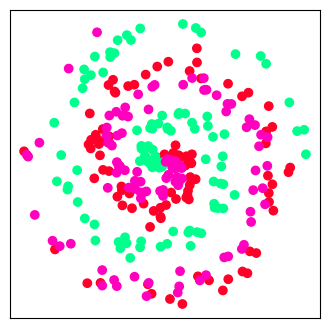

In [40]:
plt.figure(figsize=(4,4))
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.gist_rainbow)
plt.xticks([])
plt.yticks([])
plt.show()

### Modelling

#### Create the model

In [41]:
#layer 1
dense_1 = Dense_Layer(2, 3)

#activation 1
activation_1 = ReLU_Activation()

#layer 2 
dense_2 = Dense_Layer(n_inputs=3, n_neurons=3)

#activation 2 
activation_2 = Softmax_Activation()

#### Forward pass through the model

In [42]:
dense_1.forward(X)
layer_1_outputs = dense_1.output
activation_1.forward(layer_1_outputs)
activation_1_outputs = activation_1.output
dense_2.forward(activation_1_outputs)
layer_2_outputs = dense_2.output
activation_2.forward(layer_2_outputs)
activation_2_outputs = activation_2.output


In [43]:
activation_2_outputs[:5]

array([[0.33333334, 0.33333334, 0.33333334],
       [0.33333418, 0.33333272, 0.33333308],
       [0.3333347 , 0.33333236, 0.33333296],
       [0.33333558, 0.33333167, 0.33333272],
       [0.3333367 , 0.3333308 , 0.3333324 ]], dtype=float32)

# Loss Functions

## Categorical Cross-Entropy Loss

### Pure python code

In [44]:
# Value of Eular's number
import math
E = math.e
E

2.718281828459045

In [45]:
loss = [-math.log(probs[y[i]])for i,probs in enumerate(activation_2_outputs)]
loss[:5]

[1.0986122588657878,
 1.0986097554739154,
 1.098608146153878,
 1.0986055533659322,
 1.0986021559298342]

### Using numpy

In [46]:
loss_singular = -np.log(activation_2_outputs[range(len(activation_2_outputs)),list(y)])
np.mean(loss_singular)

1.0986176

In [47]:
#to prevent edge errors of log we will clip both ends of the predictions
#np.clip(activation_2_outputs, 1e-7, 1-1e-7)

### Creating a Class for Categorical Crossentropy

In [48]:
# As we will create more loss functions let's make a common Loss class
class Loss():

    def calculate(self, preds, y):

        losses = self.forward(preds, y)

        return np.mean(losses)

In [49]:
#inherit from loss class
class CategoricalCrossentropy(Loss):

    def forward(self, preds, truth):

        n_samples = len(truth)

        clipped_preds = np.clip(preds, 1e-7, 1-1e-7)
        
        #if sparsely encoded
        if len(truth.shape) == 1:
            confidences = clipped_preds[range(n_samples), truth]
        
        #if one_hot encoded
        elif len(truth.shape) == 2:
            confidences = np.sum(clipped_preds * truth, axis=1)
            
        return -np.log(confidences)

> Continuation from [Using all we built together](#code_2)

In [50]:
loss_fn1 = CategoricalCrossentropy()
loss_model_1 = loss_fn1.calculate(activation_2_outputs, y)

In [51]:
loss_model_1

1.0986176

### Accuracy

In [52]:
def accuracy(preds, truth):
    # handling one_hot
    if truth.ndim == 2:
        truth = np.argmax(truth, axis=1)
    preds = np.argmax(preds, axis=1)
    return np.mean(preds==truth)

In [53]:
accuracy(activation_2_outputs, y)

0.3333333333333333

# Optimization

## Random initialization

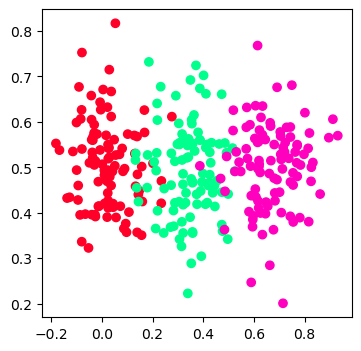

In [54]:
# Let's create a more simple dataset
from nnfs.datasets import vertical_data

X, y = vertical_data(samples=100, classes=3)
plt.figure(figsize=(4,4))
plt.scatter(X[:,0], X[:,1], c = y, cmap=plt.cm.gist_rainbow)
plt.xticks()
plt.yticks()
plt.show()

In [55]:
epochs = 10000
hidden_layer_nodes = 3
lowest_loss = 99999
dense_1 = Dense_Layer(2, hidden_layer_nodes)
relu_1 = ReLU_Activation()
dense_2 = Dense_Layer(hidden_layer_nodes, 3)
softmax_1 = Softmax_Activation()
lossfunc = CategoricalCrossentropy()

for _ in range(epochs):
    dense_1.weights = 0.05 * np.random.randn(*dense_1.weights.shape)
    dense_1.biases = 0.05 * np.random.randn(*dense_1.biases.shape)
    dense_2.weights = 0.05 * np.random.randn(*dense_2.weights.shape)
    dense_2.biases = 0.05 * np.random.randn(*dense_2.biases.shape)
     
    dense_1.forward(X)
    relu_1.forward(dense_1.output)
    dense_2.forward(relu_1.output)
    softmax_1.forward(dense_2.output)
    loss = lossfunc.calculate(softmax_1.output, y)
    acc = accuracy(softmax_1.output, y)

    if loss < lowest_loss:
        print(f'epoch : {_ + 1}/{epochs}\n---------------------------------------------------\nLoss has decreased from {lowest_loss} to {loss}\n accuracy : {acc}')
        lowest_loss = loss
        dense_1_weights = dense_1.weights.copy()
        dense_1_biases = dense_1.biases.copy()
        dense_2_weights = dense_2.weights.copy()
        dense_2_biases = dense_2.biases.copy()
        print('')
    

epoch : 1/10000
---------------------------------------------------
Loss has decreased from 99999 to 1.098744511604309
 accuracy : 0.3333333333333333

epoch : 5/10000
---------------------------------------------------
Loss has decreased from 1.098744511604309 to 1.0983238220214844
 accuracy : 0.3333333333333333

epoch : 28/10000
---------------------------------------------------
Loss has decreased from 1.0983238220214844 to 1.096948504447937
 accuracy : 0.3333333333333333

epoch : 1136/10000
---------------------------------------------------
Loss has decreased from 1.096948504447937 to 1.0964627265930176
 accuracy : 0.3333333333333333

epoch : 3820/10000
---------------------------------------------------
Loss has decreased from 1.0964627265930176 to 1.0963661670684814
 accuracy : 0.3333333333333333

epoch : 5364/10000
---------------------------------------------------
Loss has decreased from 1.0963661670684814 to 1.0958675146102905
 accuracy : 0.58



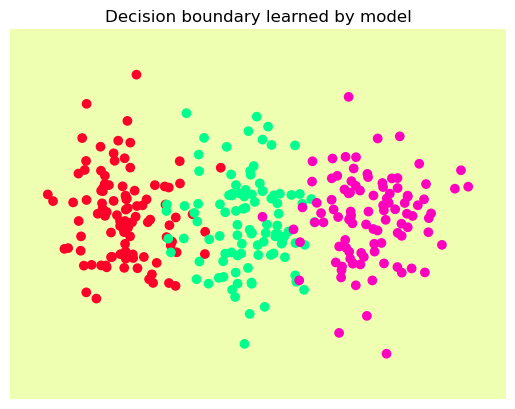

In [56]:
def plot_preds_1():
    ymi, yma, xmi, xma = X.transpose()[1].min() - 0.1, X.transpose()[1].max() + 0.1,X.transpose()[0].min()- 0.1, X.transpose()[0].max() + 0.1
    a = np.linspace(xmi,xma, 2000)
    b = np.linspace(ymi,yma, 2000)
    xx,yy = np.meshgrid(a,b)
    data = np.c_[xx.ravel(),yy.ravel()]
    dense_1.forward(data)
    relu_1.forward(dense_1.output)
    dense_2.forward(relu_1.output)
    softmax_1.forward(dense_2.output)
    preders = np.argmax(softmax_1.output, axis=1)
    plt.figure()
    plt.contourf(xx,yy, preders.reshape((2000,2000)),cmap=plt.cm.gist_rainbow, alpha = 0.3)
    plt.scatter(X.transpose()[0],X.transpose()[1], c = y, cmap=plt.cm.gist_rainbow,alpha=1)
    plt.title('Decision boundary learned by model')
    plt.axis(False)
    plt.show()
plot_preds_1()

## Random adjustment
- Code is same as Random initialization but instead of initializing every time we add to current weights and restore best weights if loss does not reduce

In [57]:
epochs = 10000
hidden_layer_nodes = 3
lowest_loss = 99999
dense_1 = Dense_Layer(2, hidden_layer_nodes)
relu_1 = ReLU_Activation()
dense_2 = Dense_Layer(hidden_layer_nodes, 3)
softmax_1 = Softmax_Activation()
lossfunc = CategoricalCrossentropy()

for _ in range(epochs):
    dense_1.weights += 0.05 * np.random.randn(*dense_1.weights.shape)
    dense_1.biases += 0.05 * np.random.randn(*dense_1.biases.shape)
    dense_2.weights += 0.05 * np.random.randn(*dense_2.weights.shape)
    dense_2.biases += 0.05 * np.random.randn(*dense_2.biases.shape)
     
    dense_1.forward(X)
    relu_1.forward(dense_1.output)
    dense_2.forward(relu_1.output)
    softmax_1.forward(dense_2.output)
    loss = lossfunc.calculate(softmax_1.output, y)
    acc = accuracy(softmax_1.output, y)

    if loss < lowest_loss:
        print(f'epoch : {_ + 1}/{epochs}\n---------------------------------------------------\nLoss has decreased from {lowest_loss} to {loss}\n accuracy : {acc}')
        lowest_loss = loss
        dense_1_weights = dense_1.weights.copy()
        dense_1_biases = dense_1.biases.copy()
        dense_2_weights = dense_2.weights.copy()
        dense_2_biases = dense_2.biases.copy()
        print('')
    else:
        dense_1.weights = dense_1_weights.copy()
        dense_1.biases = dense_1_biases.copy()
        dense_2.weights = dense_2_weights.copy()
        dense_2.biases = dense_2_biases.copy()

epoch : 1/10000
---------------------------------------------------
Loss has decreased from 99999 to 1.0992566347122192
 accuracy : 0.3333333333333333

epoch : 17/10000
---------------------------------------------------
Loss has decreased from 1.0992566347122192 to 1.0988746881484985
 accuracy : 0.3333333333333333

epoch : 22/10000
---------------------------------------------------
Loss has decreased from 1.0988746881484985 to 1.0966914892196655
 accuracy : 0.3333333333333333

epoch : 25/10000
---------------------------------------------------
Loss has decreased from 1.0966914892196655 to 1.096348524093628
 accuracy : 0.3333333333333333

epoch : 27/10000
---------------------------------------------------
Loss has decreased from 1.096348524093628 to 1.0961793661117554
 accuracy : 0.3333333333333333

epoch : 28/10000
---------------------------------------------------
Loss has decreased from 1.0961793661117554 to 1.0952434539794922
 accuracy : 0.3333333333333333

epoch : 29/10000
---

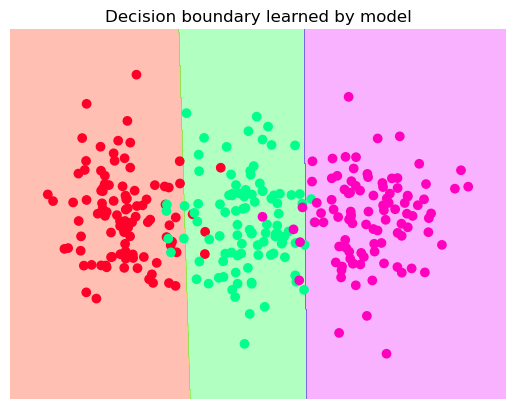

In [58]:
def plot_preds_1():
    ymi, yma, xmi, xma = X.transpose()[1].min() - 0.1, X.transpose()[1].max() + 0.1,X.transpose()[0].min()- 0.1, X.transpose()[0].max() + 0.1
    a = np.linspace(xmi,xma, 2000)
    b = np.linspace(ymi,yma, 2000)
    xx,yy = np.meshgrid(a,b)
    data = np.c_[xx.ravel(),yy.ravel()]
    dense_1.forward(data)
    relu_1.forward(dense_1.output)
    dense_2.forward(relu_1.output)
    softmax_1.forward(dense_2.output)
    preders = np.argmax(softmax_1.output, axis=1)
    plt.figure()
    plt.contourf(xx,yy, preders.reshape((2000,2000)),cmap=plt.cm.gist_rainbow, alpha = 0.3)
    plt.scatter(X.transpose()[0],X.transpose()[1], c = y, cmap=plt.cm.gist_rainbow,alpha=1)
    plt.title('Decision boundary learned by model')
    plt.axis(False)
    plt.show()
plot_preds_1()

### Trying this with spiral data

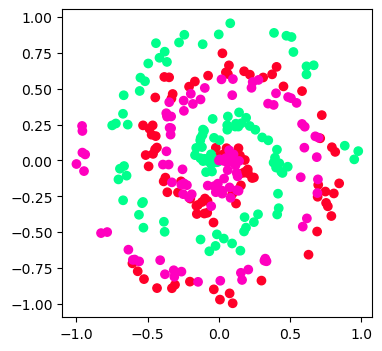

epoch : 1/10000
---------------------------------------------------
Loss has decreased from 99999 to 1.1012063026428223
 accuracy : 0.3333333333333333

epoch : 2/10000
---------------------------------------------------
Loss has decreased from 1.1012063026428223 to 1.098899245262146
 accuracy : 0.35333333333333333

epoch : 5/10000
---------------------------------------------------
Loss has decreased from 1.098899245262146 to 1.0984879732131958
 accuracy : 0.3333333333333333

epoch : 8/10000
---------------------------------------------------
Loss has decreased from 1.0984879732131958 to 1.0981206893920898
 accuracy : 0.35

epoch : 11/10000
---------------------------------------------------
Loss has decreased from 1.0981206893920898 to 1.0980405807495117
 accuracy : 0.35

epoch : 13/10000
---------------------------------------------------
Loss has decreased from 1.0980405807495117 to 1.0971252918243408
 accuracy : 0.37333333333333335

epoch : 19/10000
--------------------------------

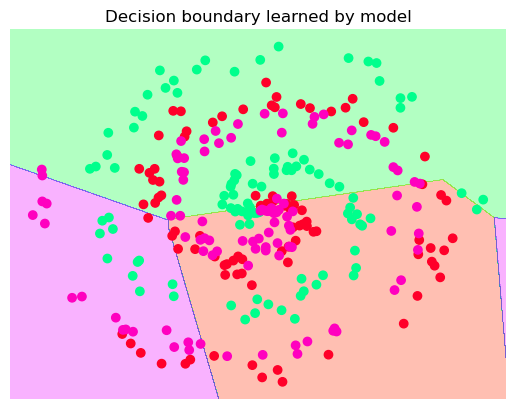

In [59]:
X, y = spiral_data(samples=100, classes=3)
plt.figure(figsize=(4,4))
plt.scatter(X[:,0], X[:,1], c = y, cmap=plt.cm.gist_rainbow)
plt.xticks()
plt.yticks()
plt.show()

epochs = 10000
hidden_layer_nodes = 3
lowest_loss = 99999
dense_1 = Dense_Layer(2, hidden_layer_nodes)
relu_1 = ReLU_Activation()
dense_2 = Dense_Layer(hidden_layer_nodes, 3)
softmax_1 = Softmax_Activation()
lossfunc = CategoricalCrossentropy()

for _ in range(epochs):
    dense_1.weights += 0.05 * np.random.randn(*dense_1.weights.shape)
    dense_1.biases += 0.05 * np.random.randn(*dense_1.biases.shape)
    dense_2.weights += 0.05 * np.random.randn(*dense_2.weights.shape)
    dense_2.biases += 0.05 * np.random.randn(*dense_2.biases.shape)
     
    dense_1.forward(X)
    relu_1.forward(dense_1.output)
    dense_2.forward(relu_1.output)
    softmax_1.forward(dense_2.output)
    loss = lossfunc.calculate(softmax_1.output, y)
    acc = accuracy(softmax_1.output, y)

    if loss < lowest_loss:
        print(f'epoch : {_ + 1}/{epochs}\n---------------------------------------------------\nLoss has decreased from {lowest_loss} to {loss}\n accuracy : {acc}')
        lowest_loss = loss
        dense_1_weights = dense_1.weights.copy()
        dense_1_biases = dense_1.biases.copy()
        dense_2_weights = dense_2.weights.copy()
        dense_2_biases = dense_2.biases.copy()
        print('')
    else:
        dense_1.weights = dense_1_weights.copy()
        dense_1.biases = dense_1_biases.copy()
        dense_2.weights = dense_2_weights.copy()
        dense_2.biases = dense_2_biases.copy()

def plot_preds_1():
    ymi, yma, xmi, xma = X.transpose()[1].min() - 0.1, X.transpose()[1].max() + 0.1,X.transpose()[0].min()- 0.1, X.transpose()[0].max() + 0.1
    a = np.linspace(xmi,xma, 2000)
    b = np.linspace(ymi,yma, 2000)
    xx,yy = np.meshgrid(a,b)
    data = np.c_[xx.ravel(),yy.ravel()]
    dense_1.forward(data)
    relu_1.forward(dense_1.output)
    dense_2.forward(relu_1.output)
    softmax_1.forward(dense_2.output)
    preders = np.argmax(softmax_1.output, axis=1)
    plt.figure()
    plt.contourf(xx,yy, preders.reshape((2000,2000)),cmap=plt.cm.gist_rainbow, alpha = 0.3)
    plt.scatter(X.transpose()[0],X.transpose()[1], c = y, cmap=plt.cm.gist_rainbow,alpha=1)
    plt.title('Decision boundary learned by model')
    plt.axis(False)
    plt.show()
plot_preds_1()

# Optimizing Using gradients
- Instead of randdomly adjusting let's adjust the parameters using the gradients of each parameter relative to the loss so we can get the loss function as close to a minimum as possible

## FIrst layer

### Using only one sample 

Let's calculate the gradients of the first layer only 
- In this situation we have 4 inputs and 3 neurons so the weights are an array of shape (4,3) transposed

In [60]:
# Let's assume the gradients received from th next layer to this 3 neurons is a vector of 1s
dvalues = np.ones(shape=(1,3))
dvalues

array([[1., 1., 1.]])

In [61]:
weights = np.array(
    object=[[ 0.2 , 0.8 , - 0.5 , 1 ],
            [ 0.5 , - 0.91 , 0.26 , - 0.5 ],
            [ - 0.26 , - 0.27 , 0.17 , 0.87 ]]
).T

In [62]:
dx0 = sum (weights[ 0 ] * dvalues[ 0 ])
dx1 = sum (weights[ 1 ] * dvalues[ 0 ])
dx2 = sum (weights[ 2 ] * dvalues[ 0 ])
dx3 = sum (weights[ 3 ] * dvalues[ 0 ])
dinputs = np.array([dx0, dx1, dx2, dx3])
print (dinputs)

[ 0.44 -0.38 -0.07  1.37]


In [63]:
np.dot(dvalues, weights.T)

array([[ 0.44, -0.38, -0.07,  1.37]], dtype=float32)

### Using batches
- for visualization perpuses we will only take a batch of 3

In [64]:
dvalues = np.array([[ 1. , 1. , 1. ],
[ 2. , 2. , 2. ],
[ 3. , 3. , 3. ]])

#each row represents a sample of data

In [65]:
weights = np.array([[ 0.2 , 0.8 , - 0.5 , 1 ],
[ 0.5 , - 0.91 , 0.26 , - 0.5 ],
[ - 0.26 , - 0.27 , 0.17 , 0.87 ]]).T
# weights are the same as before

In [66]:
#Simply get the gradients of each input by the dot product
dinputs = np.dot(dvalues, weights.T)
dinputs

array([[ 0.44, -0.38, -0.07,  1.37],
       [ 0.88, -0.76, -0.14,  2.74],
       [ 1.32, -1.14, -0.21,  4.11]], dtype=float32)

to calculate the gradients of the weights we have to dot product the inputs transposed with the gradient values received

In [67]:
inputs = np.array([[ 1 , 2 , 3 , 2.5 ],
[ 2. , 5. , - 1. , 2 ],
[ - 1.5 , 2.7 , 3.3 , - 0.8 ]])

In [68]:
dweights = np.dot(inputs.T, dvalues)
dweights

array([[ 0.5,  0.5,  0.5],
       [20.1, 20.1, 20.1],
       [10.9, 10.9, 10.9],
       [ 4.1,  4.1,  4.1]], dtype=float32)

to calucalate the gradients of the biases as the derivative of a constant is 0 we just have to sum the value of each gradient passed for each sample 

In [69]:
biases = np.array([[ 2 , 3 , 0.5 ]])

In [70]:
dbiases = np.sum(dvalues, axis=0, keepdims=True)
dbiases

array([[6., 6., 6.]])

## Applying the derivative of Relu

In [71]:
# Example layer output with 4 neurons and 3 samples
z = np.array([[ 1 , 2 , - 3 , - 4 ],
[ 2 , - 7 , - 1 , 3 ],
[ - 1 , 2 , 5 , - 1 ]])
dvalues = np.array([[ 1 , 2 , 3 , 4 ],
[ 5 , 6 , 7 , 8 ],
[ 9 , 10 , 11 , 12 ]])

In [72]:
drelu = (z>0).astype(np.int32)
print(drelu)

[[1 1 0 0]
 [1 0 0 1]
 [0 1 1 0]]


In [73]:
#now we multtiply by the dvalues
drelu*= dvalues
drelu

array([[ 1,  2,  0,  0],
       [ 5,  0,  0,  8],
       [ 0, 10, 11,  0]])

In [74]:
# we can shorten this as 
z = np.array([[ 1 , 2 , - 3 , - 4 ],
[ 2 , - 7 , - 1 , 3 ],
[ - 1 , 2 , 5 , - 1 ]])
dvalues = np.array([[ 1 , 2 , 3 , 4 ],
[ 5 , 6 , 7 , 8 ],
[ 9 , 10 , 11 , 12 ]])
drelu = dvalues.copy()
drelu[z<=0] =0 
drelu

array([[ 1,  2,  0,  0],
       [ 5,  0,  0,  8],
       [ 0, 10, 11,  0]])

## Doing one forward and backward pass for a whole layer

In [75]:
dvalues = np.array([[ 1. , 1. , 1. ],
[ 2. , 2. , 2. ],
[ 3. , 3. , 3. ]])

# We have 3 sets of inputs - samples

inputs = np.array([[ 1 , 2 , 3 , 2.5 ],
[ 2. , 5. , - 1. , 2 ],
[ - 1.5 , 2.7 , 3.3 , - 0.8 ]])

# We have 3 sets of weights - one set for each neuron
# we have 4 inputs, thus 4 weights
# recall that we keep weights transposed

weights = np.array([[ 0.2 , 0.8 , - 0.5 , 1 ],
[ 0.5 , - 0.91 , 0.26 , - 0.5 ],
[ - 0.26 , - 0.27 , 0.17 , 0.87 ]]).T

# One bias for each neuron
# biases are the row vector with a shape (1, neurons)

biases = np.array([[ 2 , 3 , 0.5 ]])

In [76]:
# Forward pass

layer_1_outputs = np.dot(inputs, weights) + biases
relu_outputs = np.maximum(0, layer_1_outputs)

# Calculating gradients

drelu = dvalues.copy()
drelu[layer_1_outputs <=0] = 0

dinputs = np.dot(drelu, weights.T)

dweights = np.dot(inputs.T, drelu)

dbiases = np.sum(dbiases, axis=0, keepdims=True)

In [77]:
dinputs, dweights, dbiases

(array([[ 0.44, -0.38, -0.07,  1.37],
        [-0.12,  1.06, -0.66,  3.74],
        [ 1.32, -1.14, -0.21,  4.11]], dtype=float32),
 array([[ 0.5, -3.5,  0.5],
        [20.1, 10.1, 20.1],
        [10.9, 12.9, 10.9],
        [ 4.1,  0.1,  4.1]], dtype=float32),
 array([[6., 6., 6.]]))

In [78]:
# Back propagation step
weights -= 0.001 * dweights
biases -= 0.001 * dbiases
weights, biases

(array([[ 0.1995,  0.5035, -0.2605],
        [ 0.7799, -0.9201, -0.2901],
        [-0.5109,  0.2471,  0.1591],
        [ 0.9959, -0.5001,  0.8659]]),
 array([[1.994, 2.994, 0.494]]))

## Adding backward methods to existing Dense and Relu Classes

In [79]:
# Dense Layer with backpropagation
class Dense_Layer():

    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)#Already transposed
        self.biases = np.zeros(shape=(1, n_neurons))

    def forward(self, inputs : np.ndarray):
        self.output = np.dot(inputs, self.weights) + self.biases
        # Saving the inputs for backpropagation using
        self.inputs = inputs

    # Backward propagation method
    def backward(self, dvalues):
        self.dweights = np.dot(self.inputs.T, dvalues)
        
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)

        self.dinputs = np.dot(dvalues, self.weights.T)
    

In [80]:
# ReLU activation with backpropagation
class ReLU_Activation():

    def forward(self, inputs):
        self.output = np.maximum(0, inputs)
        #Save the inputs for backpropagation
        self.inputs = inputs

    def backward(self, dvalues):
        self.dinputs = dvalues.copy()
        self.dinputs[self.inputs <= 0] = 0

## Gradient of Categorical crossentropy

In [81]:
class CategoricalCrossentropy(Loss):

    def forward(self, preds, truth):

        n_samples = len(truth)

        clipped_preds = np.clip(preds, 1e-7, 1-1e-7)
        
        #if sparsely encoded
        if len(truth.shape) == 1:
            confidences = clipped_preds[range(n_samples), truth]
            truth = np.eye(len(preds[0]))[truth]
        
        #if one_hot encoded
        elif len(truth.shape) == 2:
            confidences = np.sum(clipped_preds * truth, axis=1)

        #save the predictions and truths for backpropagation
        self.preds = preds
        self.truth = truth

        return -np.log(confidences)
    
    #Adding backward propagation
    def backward(self, truth, preds):

        n_samples = len(truth)
        
        if len(truth.shape) == 1:
            truth = np.eye(len(preds[0]))[truth]
        self.dinputs = (-truth/preds)/n_samples

## Gradient of Softmax Activation

In [82]:
class Softmax_Activation():

    def forward(self, inputs):

        self.inputs = inputs

        exps = np.exp(inputs-np.max(inputs, axis=-1, keepdims=True))
        self.output = exps/ np.sum(exps, axis=-1, keepdims=True)
    
    def backward(self, dvalues):
        self.dinputs = np.empty_like(dvalues) 
        for i , (output, dvalue) in enumerate(zip(self.output, dvalues)):
            output = np.expand_dims(output, axis=-1)
            jac = np.diagflat(output) - np.dot(output, output.T)

            self.dinputs[i] = np.dot(jac,dvalue)

## Common class for softmax and categorical crossentropy

As both these layers mostly come together let's create a combined function 
> Derivative of both loss and softmax is `y^hat - y` so let's optimize using our knowledge on one_hot encoders

In [83]:
class CategoricalCrossentropyWithSoftmax():

    def __init__(self):
        self.activation = Softmax_Activation()
        self.loss = CategoricalCrossentropy()

    def forward(self, inputs, truth):

        self.activation.forward(inputs)
        self.output = self.activation.output

        return self.loss.calculate(self.output, truth) 
    
    def backward(self, preds, truth):

        samples = preds.shape[0]

        if len(truth.shape) == 2:
            truth = np.argmax(truth, axis = -1)

        self.dinputs = preds.copy()

        self.dinputs[range(samples), truth] -= 1

        self.dinputs /= samples

### Testing if combined function outputs are same as separated
- No need to check forward propagation as steps are same and easy

#### Sample truths and predictions

In [84]:
softmax_outputs = np.array([[ 0.7 , 0.1 , 0.2 ],
[ 0.1 , 0.5 , 0.4 ],
[ 0.02 , 0.9 , 0.08 ]])

class_targets = np.array([ 0 , 1 , 1 ])


#### Defining layer

In [85]:
test_softmax = Softmax_Activation()
test_loss = CategoricalCrossentropy()
test_loss_softmax = CategoricalCrossentropyWithSoftmax()

#### Performing Backpropagation

In [86]:
#Separated Layers
test_loss.backward(class_targets, softmax_outputs)
test_loss_grads = test_loss.dinputs
test_softmax.output = softmax_outputs
test_softmax.backward(test_loss_grads)
test_softmax_grads = test_softmax.dinputs
print('Final Grads Separated: ', test_softmax_grads)

#Combined Layers
test_loss_softmax.backward(softmax_outputs, class_targets)
test_softmax_loss_grads = test_loss_softmax.dinputs
print('Final Grads Combined: ', test_softmax_loss_grads)

print(np.isclose(test_softmax_grads, test_softmax_loss_grads))

Final Grads Separated:  [[-0.09999999  0.03333334  0.06666667]
 [ 0.03333334 -0.16666667  0.13333334]
 [ 0.00666667 -0.03333333  0.02666667]]
Final Grads Combined:  [[-0.1         0.03333333  0.06666667]
 [ 0.03333333 -0.16666667  0.13333333]
 [ 0.00666667 -0.03333333  0.02666667]]
[[ True  True  True]
 [ True  True  True]
 [ True  True  True]]


## Comparison
- The main reason we used the combined method is as it only does a simple subtraction it is much more faster then computing using separate methods

In [87]:
from timeit import timeit

In [88]:
def sep():
    test_softmax = Softmax_Activation()
    test_loss = CategoricalCrossentropy()
    test_loss.backward(class_targets, softmax_outputs)
    test_softmax.output = softmax_outputs
    test_softmax.backward(test_loss.dinputs)
    test_softmax_grads = test_softmax.dinputs

def com():
    test_loss_softmax = CategoricalCrossentropyWithSoftmax()
    test_loss_softmax.backward(softmax_outputs, class_targets)
    test_softmax_loss_grads = test_loss_softmax.dinputs

septime = timeit(lambda : sep(), number=10000)
comtime = timeit(lambda : com(), number=10000)
print(septime/comtime)

10.836616907335712


# Doing one full forward step and backward step from the current tools we have built

## Dataset

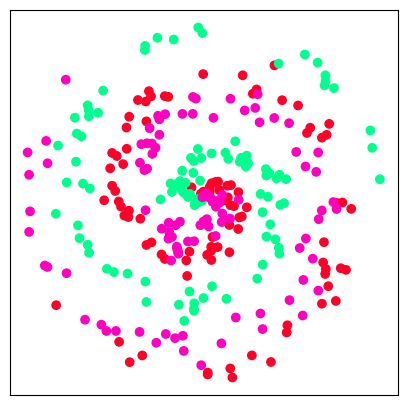

In [89]:
NUM_CLASSES = 3
X, y = spiral_data(100, NUM_CLASSES)
plt.figure(figsize=(5,5))
plt.scatter(X[...,0], X[...,1], c=y, cmap=plt.cm.gist_rainbow)
plt.xticks([])
plt.yticks([])
plt.show()

## Modelling

### Initialize

In [90]:
L1_NEURONS = 3

dense_1 = Dense_Layer(X.shape[-1], L1_NEURONS)

activation_relu = ReLU_Activation()

dense_2 = Dense_Layer(L1_NEURONS, NUM_CLASSES)

activation_softmax_and_loss = CategoricalCrossentropyWithSoftmax()

### Forward Pass

In [91]:
dense_1.forward(X)

activation_relu.forward(dense_1.output)

dense_2.forward(activation_relu.output)

loss = activation_softmax_and_loss.forward(dense_2.output, y)

print('First Predictions :', activation_softmax_and_loss.output[:5])
print('Loss :', loss)
print('Accuracy :', accuracy(dense_2.output, y))

First Predictions : [[0.33333334 0.33333334 0.33333334]
 [0.33333322 0.33333305 0.33333376]
 [0.33333236 0.33333334 0.33333433]
 [0.33333224 0.33333236 0.3333354 ]
 [0.33333272 0.33333206 0.33333522]]
Loss : 1.0986142
Accuracy : 0.3566666666666667


### Backward pass

In [92]:
activation_softmax_and_loss.backward(activation_softmax_and_loss.output, y)

dense_2.backward(activation_softmax_and_loss.dinputs)

activation_relu.backward(dense_2.dinputs)

dense_1.backward(activation_relu.dinputs)


print('Dense 1 d_weights :', dense_1.dweights, sep='\n')
print('Dense 1 d_biases :', dense_1.dbiases, sep='\n')
print('Dense 2 d_weights :', dense_2.dweights, sep='\n')
print('Dense 2 d_biases :', dense_2.dbiases, sep='\n')

Dense 1 d_weights :
[[-5.8149792e-05  2.4402580e-05  2.8092100e-04]
 [-5.0671649e-04  1.7054063e-04  1.0291162e-04]]
Dense 1 d_biases :
[[-0.00021642  0.0001244   0.00053419]]
Dense 2 d_weights :
[[ 1.1239370e-04 -5.4045355e-05 -5.8348349e-05]
 [ 5.6148470e-05 -1.9555443e-04  1.3940595e-04]
 [ 9.7653930e-05 -1.4373595e-04  4.6082023e-05]]
Dense 2 d_biases :
[[-6.5650092e-06  2.2621825e-06  4.1299500e-06]]


### Adjust the weights and see predictions

In [93]:
# Reusable Function
def plot_preds(w1, b1, w2, b2, X, y, name=''):
    ymi, yma, xmi, xma = X.transpose()[1].min() - 0.1, X.transpose()[1].max() + 0.1,X.transpose()[0].min()- 0.1, X.transpose()[0].max() + 0.1
    a = np.linspace(xmi,xma, 2000)
    b = np.linspace(ymi,yma, 2000)
    xx,yy = np.meshgrid(a,b)
    data = np.c_[xx.ravel(),yy.ravel()]
    dense_1 = Dense_Layer(*w1.shape)
    dense_2 = Dense_Layer(*w2.shape)
    relu_1 = ReLU_Activation()
    softmax_1 = Softmax_Activation()
    dense_1.weights = w1
    dense_1.biases = b1
    dense_2.weights = w2
    dense_2.biases = b2
    dense_1.forward(data)
    relu_1.forward(dense_1.output)
    dense_2.forward(relu_1.output)
    softmax_1.forward(dense_2.output)
    preders = np.argmax(softmax_1.output, axis=1)
    plt.figure()
    plt.contourf(xx,yy, preders.reshape((2000,2000)),cmap=plt.cm.gist_rainbow, alpha = 0.3)
    plt.scatter(X.transpose()[0],X.transpose()[1], c = y, cmap=plt.cm.gist_rainbow,alpha=1)
    plt.title(f'Decision boundary learned by model {name}')
    plt.axis(False)
    plt.show()

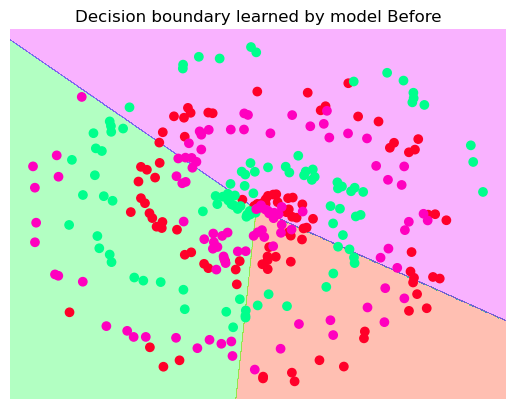

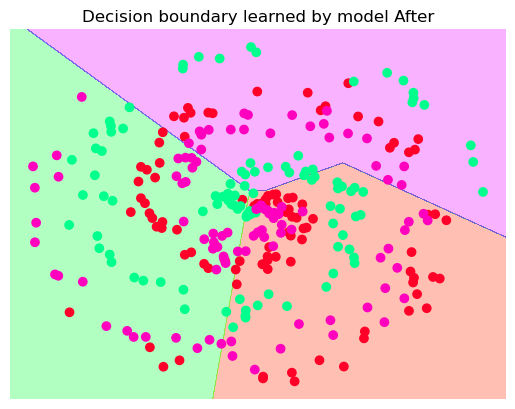

In [94]:
plot_preds(
        w1=dense_1.weights,
        b1=dense_1.biases,
        w2=dense_2.weights,
        b2=dense_2.biases,
        X=X,
        y=y,
        name='Before'
        )
dense_1.weights -= dense_1.dweights
dense_1.biases -= dense_1.dbiases
dense_2.weights -= dense_2.dweights
dense_2.biases -= dense_2.dbiases
plot_preds(
        w1=dense_1.weights,
        b1=dense_1.biases,
        w2=dense_2.weights,
        b2=dense_2.biases,
        X=X,
        y=y,
        name='After'
        )

# Optimizers

## Stochastic Gradient Descent - `SGD`

- What we did before is the same as this

In [95]:
class SGD():

    def __init__(self, learning_rate = 1.0):

        self.learning_rate = learning_rate

    def update_params(self, layer):

        layer.weights -= self.learning_rate * layer.dweights
        layer.biases -= self.learning_rate * layer.dbiases

## Using SGD with a model of 1 hidden layer with 64 neurons

In [96]:
NUM_CLASSES = 3
L1_NEURONS = 64

### Dataset

In [97]:
# Create reusable plot function
def plot_data(X,y, c=None, name=''):
    if c is None:
        c = plt.cm.gist_rainbow
    plt.figure(figsize=(5,5))
    plt.title(name)
    plt.scatter(X[...,0], X[...,1], c=y, cmap=c)
    plt.xticks([])
    plt.yticks([])
    plt.show()

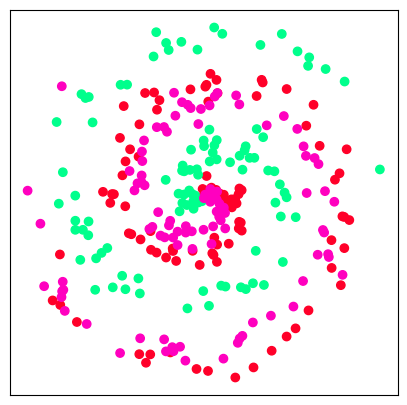

In [98]:
X,y = spiral_data(100, NUM_CLASSES)
plot_data(X,y)

### Modelling

#### Initialization

In [99]:
dense_1 = Dense_Layer(X.shape[-1], L1_NEURONS)
relu_1 = ReLU_Activation()
dense_2 = Dense_Layer(L1_NEURONS, NUM_CLASSES)
softmax_loss = CategoricalCrossentropyWithSoftmax()
sgd = SGD()

#### Forward, Backward and Optimization of model

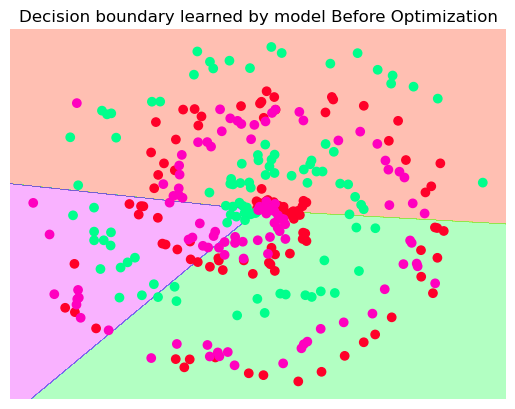

Accuracy : 0.27


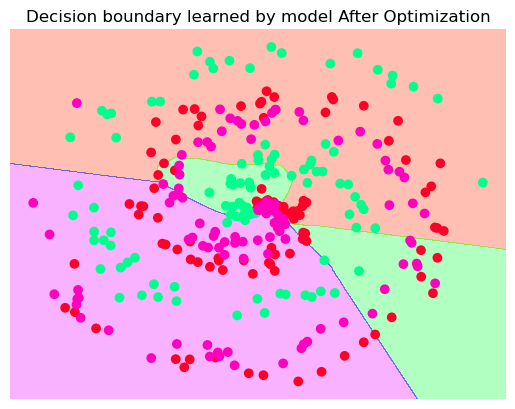

In [100]:
#Forward
dense_1.forward(X)
relu_1.forward(dense_1.output)
dense_2.forward(relu_1.output)
loss = softmax_loss.forward(dense_2.output, y)
plot_preds(dense_1.weights, dense_1.biases, dense_2.weights, dense_2.biases, X,y, name='Before Optimization')
acc = accuracy(softmax_loss.output, y)
print('Accuracy :', acc)

#Backward
softmax_loss.backward(softmax_loss.output, y)
dense_2.backward(softmax_loss.dinputs)
relu_1.backward(dense_2.dinputs)
dense_1.backward(relu_1.dinputs)

#Optimize
sgd.update_params(dense_1)
sgd.update_params(dense_2)
plot_preds(dense_1.weights, dense_1.biases, dense_2.weights, dense_2.biases, X,y, name='After Optimization')


#### Running for multiple epochs

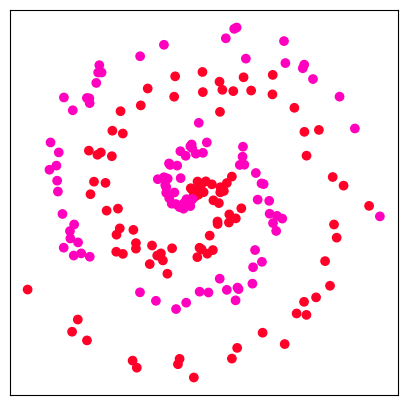

In [101]:
NUM_EPOCHS = 10000
NUM_CLASSES = 2
L1_NEURONS = 64
X,y = spiral_data(100, NUM_CLASSES)
plot_data(X,y)
dense_1 = Dense_Layer(X.shape[-1], L1_NEURONS)
relu_1 = ReLU_Activation()
dense_2 = Dense_Layer(L1_NEURONS, NUM_CLASSES)
softmax_loss = CategoricalCrossentropyWithSoftmax()
sgd = SGD()

In [102]:
if RUN_EXPERIMENTS:
    for epoch in range(NUM_EPOCHS):
        #Forward
        dense_1.forward(X)
        relu_1.forward(dense_1.output)
        dense_2.forward(relu_1.output)
        loss = softmax_loss.forward(dense_2.output, y)
        if epoch%100 == 0:
            if epoch%1000 == 0:
                plot_preds(dense_1.weights, dense_1.biases, dense_2.weights, dense_2.biases, X,y)
            acc = accuracy(softmax_loss.output, y)
            print('Accuracy :', acc, 'Epoch', epoch, 'Loss', loss)


        #Backward
        softmax_loss.backward(softmax_loss.output, y)
        dense_2.backward(softmax_loss.dinputs)
        relu_1.backward(dense_2.dinputs)
        dense_1.backward(relu_1.dinputs)

        #Optimize
        sgd.update_params(dense_1)
        sgd.update_params(dense_2)
        plot_preds(dense_1.weights, dense_1.biases, dense_2.weights, dense_2.biases, X,y, name='Final')

## Experimenting with learning rate

### Create Training Function

In [103]:
def run_experiment(learning_rate=1.0, NUM_EPOCHS = 10000,NUM_CLASSES = 2,  L1_NEURONS = 64, NUM_SAMPLES=100, draw = False):
    X,y = spiral_data(NUM_SAMPLES, NUM_CLASSES)
    plot_data(X,y)
    dense_1 = Dense_Layer(X.shape[-1], L1_NEURONS)
    relu_1 = ReLU_Activation()
    dense_2 = Dense_Layer(L1_NEURONS, NUM_CLASSES)
    softmax_loss = CategoricalCrossentropyWithSoftmax()
    sgd = SGD(learning_rate=learning_rate)
    for epoch in range(NUM_EPOCHS):
        #Forward
        dense_1.forward(X)
        relu_1.forward(dense_1.output)
        dense_2.forward(relu_1.output)
        loss = softmax_loss.forward(dense_2.output, y)
        if epoch%100 == 0:
            if epoch%1000 == 0 and draw:
                plot_preds(dense_1.weights, dense_1.biases, dense_2.weights, dense_2.biases, X,y)
            acc = accuracy(softmax_loss.output, y)
            print('Accuracy :', acc, 'Epoch', epoch, 'Loss', loss)


        #Backward
        softmax_loss.backward(softmax_loss.output, y)
        dense_2.backward(softmax_loss.dinputs)
        relu_1.backward(dense_2.dinputs)
        dense_1.backward(relu_1.dinputs)

        #Optimize
        sgd.update_params(dense_1)
        sgd.update_params(dense_2)
    plot_preds(dense_1.weights, dense_1.biases, dense_2.weights, dense_2.biases, X,y, name='Final')

In [104]:
if RUN_EXPERIMENTS:
    run_experiment(0.85)

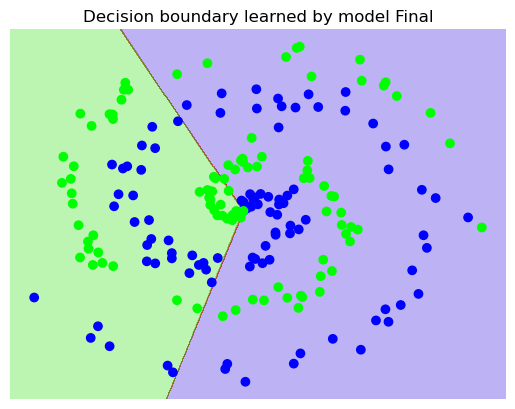

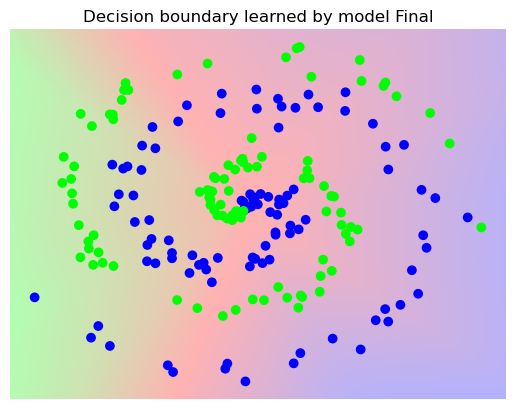

In [105]:
def plot_preds(w1, b1, w2, b2, X, y, name=''):
    ymi, yma, xmi, xma = X.transpose()[1].min() - 0.1, X.transpose()[1].max() + 0.1,X.transpose()[0].min()- 0.1, X.transpose()[0].max() + 0.1
    a = np.linspace(xmi,xma, 500)
    b = np.linspace(ymi,yma, 500)
    xx,yy = np.meshgrid(a,b)
    data = np.c_[xx.ravel(),yy.ravel()]
    dense_1 = Dense_Layer(*w1.shape)
    dense_2 = Dense_Layer(*w2.shape)
    relu_1 = ReLU_Activation()
    softmax_1 = Softmax_Activation()
    dense_1.weights = w1
    dense_1.biases = b1
    dense_2.weights = w2
    dense_2.biases = b2
    dense_1.forward(data)
    relu_1.forward(dense_1.output)
    dense_2.forward(relu_1.output)
    softmax_1.forward(dense_2.output)
    preds = np.zeros(shape=softmax_1.output.shape[:-1])
    for x in range(len(softmax_1.output)):
        for i in range(w2.shape[-1]):
            a = softmax_1.output[...,x,i]
            preds[...,x] += a * i
    preds2 = np.argmax(softmax_1.output, axis=1)
    plt.figure()
    plt.contourf(xx,yy, preds2.reshape(500,500),cmap=plt.cm.brg, alpha = 0.3)
    plt.scatter(X.transpose()[0],X.transpose()[1], c = y, cmap=plt.cm.brg,alpha=1)
    plt.title(f'Decision boundary learned by model {name}')
    plt.axis(False)
    plt.show()
    plt.figure()
    plt.pcolormesh(xx,yy, preds.reshape(500,500),cmap=plt.cm.brg, alpha = 0.3)
    plt.scatter(X.transpose()[0],X.transpose()[1], c = y, cmap=plt.cm.brg,alpha=1)
    plt.title(f'Decision boundary learned by model {name}')
    plt.axis(False)
    plt.show()
plot_preds(dense_1.weights, dense_1.biases, dense_2.weights, dense_2.biases, X,y, name='Final')

## Learning rate decay

### Updating SGD class with decay

In [106]:
class SGD():

    def __init__(self, learning_rate = 1.0, decay = 0.):

        self.learning_rate = learning_rate
        self.decay = decay
        self.current_rate = learning_rate
        self.steps = 0
    
    def pre_update(self):

        if self.decay:

            self.current_rate = self.learning_rate / (1 + self.decay * self.steps)

    def update_params(self, layer):

        layer.weights -= self.current_rate * layer.dweights
        layer.biases -= self.current_rate * layer.dbiases
    
    def post_update(self):

        self.steps += 1

### Trying out same experiment

In [107]:
def run_experiment(learning_rate=1.0, NUM_EPOCHS = 10000,NUM_CLASSES = 3,  L1_NEURONS = 64, NUM_SAMPLES=100, DECAY=0, draw = False):
    X,y = spiral_data(NUM_SAMPLES, NUM_CLASSES)
    plot_data(X,y, c=plt.cm.brg)
    dense_1 = Dense_Layer(X.shape[-1], L1_NEURONS)
    relu_1 = ReLU_Activation()
    dense_2 = Dense_Layer(L1_NEURONS, NUM_CLASSES)
    softmax_loss = CategoricalCrossentropyWithSoftmax()
    sgd = SGD(learning_rate=learning_rate, decay=DECAY)
    for epoch in range(NUM_EPOCHS):
        #Forward
        dense_1.forward(X)
        relu_1.forward(dense_1.output)
        dense_2.forward(relu_1.output)
        loss = softmax_loss.forward(dense_2.output, y)
        if epoch%100 == 0:
            if epoch%1000 == 0 and draw:
                plot_preds(dense_1.weights, dense_1.biases, dense_2.weights, dense_2.biases, X,y)
            acc = accuracy(softmax_loss.output, y)
            print('Accuracy :', acc, 'Epoch', epoch, 'Loss', loss, 'Learning_rate :', sgd.current_rate)


        #Backward
        softmax_loss.backward(softmax_loss.output, y)
        dense_2.backward(softmax_loss.dinputs)
        relu_1.backward(dense_2.dinputs)
        dense_1.backward(relu_1.dinputs)

        #Optimize
        sgd.pre_update()
        sgd.update_params(dense_1)
        sgd.update_params(dense_2)
        sgd.post_update()
    plot_preds(dense_1.weights, dense_1.biases, dense_2.weights, dense_2.biases, X,y, name='Final')

In [108]:
if RUN_EXPERIMENTS:
    run_experiment(DECAY=1e-2)

In [109]:
# The model seems to get stuck at some point becasue the learning rate is too lower at the end because the decay is much higher

#Let's run with a smaller decay
if RUN_EXPERIMENTS:
    run_experiment(DECAY = 1e-3)

In [110]:
#Final experiment with lower loss and lower decay and a few more samples
if RUN_EXPERIMENTS:
    run_experiment(learning_rate = 0.8, DECAY = 5e-4, NUM_SAMPLES=150)

## Momentum in SGD

In [111]:
class SGD():

    def __init__(self, learning_rate = 1.0, decay = 0., momentum=0.):

        self.learning_rate = learning_rate
        self.decay = decay
        self.momentum = momentum

        self.current_rate = learning_rate

        self.steps = 0
    
    def pre_update(self):

        if self.decay:

            self.current_rate = self.learning_rate / (1 + self.decay * self.steps)

    def update_params(self, layer):

        if not hasattr(layer, 'weight_momentum'):
            layer.weight_momentum = 0
            layer.bias_momentum = 0

        layer.weight_momentum = -(self.current_rate * layer.dweights) + (layer.weight_momentum * self.momentum)
        layer.bias_momentum = -(self.current_rate * layer.dbiases) + (layer.bias_momentum * self.momentum)

        layer.weights += layer.weight_momentum
        layer.biases +=  layer.bias_momentum

    
    def post_update(self):

        self.steps += 1

### Conducting experiments

In [112]:
def run_experiment(learning_rate=1.0, NUM_EPOCHS = 10000,NUM_CLASSES = 3,  L1_NEURONS = 64, NUM_SAMPLES=100, DECAY=0, momentum=0., draw = False):
    X,y = spiral_data(NUM_SAMPLES, NUM_CLASSES)
    plot_data(X,y, c=plt.cm.brg)
    dense_1 = Dense_Layer(X.shape[-1], L1_NEURONS)
    relu_1 = ReLU_Activation()
    dense_2 = Dense_Layer(L1_NEURONS, NUM_CLASSES)
    softmax_loss = CategoricalCrossentropyWithSoftmax()
    sgd = SGD(learning_rate=learning_rate, decay=DECAY, momentum=momentum)
    losses = []
    accs = []
    lrs = []

    for epoch in range(NUM_EPOCHS):
        #Forward
        dense_1.forward(X)
        relu_1.forward(dense_1.output)
        dense_2.forward(relu_1.output)
        loss = softmax_loss.forward(dense_2.output, y)
        acc = accuracy(softmax_loss.output, y)
        if epoch%100 == 0:
            if epoch%1000 == 0 and draw:
                plot_preds(dense_1.weights, dense_1.biases, dense_2.weights, dense_2.biases, X,y)
            
            print('Accuracy :', acc, 'Epoch', epoch, 'Loss', loss, 'Learning_rate :', sgd.current_rate)
        losses.append(loss)
        accs.append(acc)
        lrs.append(sgd.current_rate)

        #Backward
        softmax_loss.backward(softmax_loss.output, y)
        dense_2.backward(softmax_loss.dinputs)
        relu_1.backward(dense_2.dinputs)
        dense_1.backward(relu_1.dinputs)

        #Optimize
        sgd.pre_update()
        sgd.update_params(dense_1)
        sgd.update_params(dense_2)
        sgd.post_update()

    plot_preds(dense_1.weights, dense_1.biases, dense_2.weights, dense_2.biases, X,y, name='Final')
    plt.figure()
    plt.plot(losses)
    plt.title('Loss')
    plt.figure()
    plt.plot(accs)
    plt.title('Accuracy')
    plt.figure()
    plt.plot(lrs)
    plt.title('Learning rate')
    

In [113]:
if RUN_EXPERIMENTS:
    run_experiment(DECAY=1e-3, momentum=0.5)

In [114]:
### Running with higher momentum
if RUN_EXPERIMENTS:
    run_experiment(DECAY = 1e-3, momentum=0.9)

## Adaptive Gradient

In [115]:
class AdaGrad():

    def __init__(self, learning_rate = 1.0, decay = 0., epsilon=1e-7):

        self.learning_rate = learning_rate
        self.decay = decay
        self.epsilon = epsilon

        self.current_rate = learning_rate

        self.steps = 0
    
    def pre_update(self):

        if self.decay:

            self.current_rate = self.learning_rate / (1 + self.decay * self.steps)

    def update_params(self, layer):

        if not hasattr(layer, 'weight_cache'):
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_cache = np.zeros_like(layer.biases)

        layer.weight_cache += layer.dweights**2
        layer.bias_cache += layer.dbiases**2

        w_update = -(self.current_rate * layer.dweights)/(np.sqrt(layer.weight_cache) + self.epsilon)
        b_update = -(self.current_rate * layer.dbiases)/(np.sqrt(layer.bias_cache) + self.epsilon)

        layer.weights += w_update
        layer.biases += b_update

    
    def post_update(self):

        self.steps += 1

In [116]:
def run_experiment_adagrad(learning_rate=1.0, NUM_EPOCHS = 10000,NUM_CLASSES = 3,  L1_NEURONS = 64, NUM_SAMPLES=100, DECAY=1e-4, draw_mid=True):
    X,y = spiral_data(NUM_SAMPLES, NUM_CLASSES)
    plot_data(X,y, c=plt.cm.brg)
    dense_1 = Dense_Layer(X.shape[-1], L1_NEURONS)
    relu_1 = ReLU_Activation()
    dense_2 = Dense_Layer(L1_NEURONS, NUM_CLASSES)
    softmax_loss = CategoricalCrossentropyWithSoftmax()
    #Works better with small decay
    sgd = AdaGrad(learning_rate=learning_rate, decay=DECAY)
    losses = []
    accs = []
    lrs = []

    for epoch in range(NUM_EPOCHS):
        #Forward
        dense_1.forward(X)
        relu_1.forward(dense_1.output)
        dense_2.forward(relu_1.output)
        loss = softmax_loss.forward(dense_2.output, y)
        acc = accuracy(softmax_loss.output, y)
        if epoch%100 == 0:
            if epoch%1000 == 0 and draw_mid:
                plot_preds(dense_1.weights, dense_1.biases, dense_2.weights, dense_2.biases, X,y)
            
            print('Accuracy :', acc, 'Epoch', epoch, 'Loss', loss, 'Learning_rate :', sgd.current_rate)
        losses.append(loss)
        accs.append(acc)
        lrs.append(sgd.current_rate)

        #Backward
        softmax_loss.backward(softmax_loss.output, y)
        dense_2.backward(softmax_loss.dinputs)
        relu_1.backward(dense_2.dinputs)
        dense_1.backward(relu_1.dinputs)

        #Optimize
        sgd.pre_update()
        sgd.update_params(dense_1)
        sgd.update_params(dense_2)
        sgd.post_update()

    plot_preds(dense_1.weights, dense_1.biases, dense_2.weights, dense_2.biases, X,y, name='Final')
    plt.figure()
    plt.plot(losses)
    plt.title('Loss')
    plt.figure()
    plt.plot(accs)
    plt.title('Accuracy')
    plt.figure()
    plt.plot(lrs)
    plt.title('Learning rate')

In [117]:
if RUN_EXPERIMENTS:
    run_experiment_adagrad(draw_mid=False)

## RMSProp

In [118]:
class RMSProp():

    def __init__(self, learning_rate = 0.001, decay = 0., epsilon=1e-7, rho=0.9):

        self.learning_rate = learning_rate
        self.decay = decay
        self.epsilon = epsilon
        self.rho = rho

        self.current_rate = learning_rate

        self.steps = 0
    
    def pre_update(self):

        if self.decay:

            self.current_rate = self.learning_rate / (1 + self.decay * self.steps)

    def update_params(self, layer):

        if not hasattr(layer, 'weight_cache'):
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_cache = np.zeros_like(layer.biases)

        layer.weight_cache = self.rho * layer.weight_cache + (1-self.rho)*layer.dweights**2
        layer.bias_cache = self.rho * layer.bias_cache + (1-self.rho)*layer.dbiases**2

        w_update = -(self.current_rate * layer.dweights)/(np.sqrt(layer.weight_cache) + self.epsilon)
        b_update = -(self.current_rate * layer.dbiases)/(np.sqrt(layer.bias_cache) + self.epsilon)

        layer.weights += w_update
        layer.biases += b_update

    
    def post_update(self):

        self.steps += 1

In [119]:
def run_experiment_rmsprop(learning_rate=0.001, NUM_EPOCHS = 10000,NUM_CLASSES = 3,  L1_NEURONS = 64, NUM_SAMPLES=100, DECAY=1e-4, rho=0.9, draw=False):
    X,y = spiral_data(NUM_SAMPLES, NUM_CLASSES)
    plot_data(X,y, c=plt.cm.brg)
    dense_1 = Dense_Layer(X.shape[-1], L1_NEURONS)
    relu_1 = ReLU_Activation()
    dense_2 = Dense_Layer(L1_NEURONS, NUM_CLASSES)
    softmax_loss = CategoricalCrossentropyWithSoftmax()
    #Works better with small decay
    sgd = RMSProp(learning_rate=learning_rate, decay=DECAY, rho=rho)
    losses = []
    accs = []
    lrs = []

    for epoch in range(NUM_EPOCHS):
        #Forward
        dense_1.forward(X)
        relu_1.forward(dense_1.output)
        dense_2.forward(relu_1.output)
        loss = softmax_loss.forward(dense_2.output, y)
        acc = accuracy(softmax_loss.output, y)
        if epoch%100 == 0:
            if epoch%1000 == 0 and draw:
                plot_preds(dense_1.weights, dense_1.biases, dense_2.weights, dense_2.biases, X,y)
            
            print('Accuracy :', acc, 'Epoch', epoch, 'Loss', loss, 'Learning_rate :', sgd.current_rate)
        losses.append(loss)
        accs.append(acc)
        lrs.append(sgd.current_rate)

        #Backward
        softmax_loss.backward(softmax_loss.output, y)
        dense_2.backward(softmax_loss.dinputs)
        relu_1.backward(dense_2.dinputs)
        dense_1.backward(relu_1.dinputs)

        #Optimize
        sgd.pre_update()
        sgd.update_params(dense_1)
        sgd.update_params(dense_2)
        sgd.post_update()

    plot_preds(dense_1.weights, dense_1.biases, dense_2.weights, dense_2.biases, X,y, name='Final')
    plt.figure()
    plt.plot(losses)
    plt.title('Loss')
    plt.figure()
    plt.plot(accs)
    plt.title('Accuracy')
    plt.figure()
    plt.plot(lrs)
    plt.title('Learning rate')

In [120]:
if RUN_EXPERIMENTS:
    run_experiment_rmsprop()

In [121]:
if RUN_EXPERIMENTS:
    run_experiment_rmsprop(learning_rate=0.02, DECAY=1e-5, rho=0.999)

# Adam Optimizer

## Code For Adam

In [122]:
class Adam():

    def __init__(self, learning_rate = 0.001, decay = 0., epsilon=1e-7, beta_1=0.9, beta_2=0.999):

        self.learning_rate = learning_rate
        self.decay = decay
        self.epsilon = epsilon
        self.beta_1 = beta_1
        self.beta_2 = beta_2

        self.current_rate = learning_rate

        self.steps = 0
    
    def pre_update(self):

        if self.decay:

            self.current_rate = self.learning_rate / (1 + self.decay * self.steps)

    def update_params(self, layer):

        if not hasattr(layer, 'weight_cache'):
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.weight_momentum = np.zeros_like(layer.weights)
            layer.bias_cache = np.zeros_like(layer.biases)
            layer.bias_momentum = np.zeros_like(layer.biases)

        layer.weight_momentum = (1 - self.beta_1) * layer.dweights + (layer.weight_momentum * self.beta_1)
        layer.bias_momentum = (1 - self.beta_1) * layer.dbiases + (layer.bias_momentum * self.beta_1)

        weight_momentum_corrected = layer.weight_momentum/(1 - self.beta_1 ** (self.steps + 1))
        bias_momentum_corrected = layer.bias_momentum/(1 - self.beta_1 ** (self.steps + 1))

        layer.weight_cache = self.beta_2 * layer.weight_cache + (1-self.beta_2)*layer.dweights**2
        layer.bias_cache = self.beta_2 * layer.bias_cache + (1-self.beta_2)*layer.dbiases**2

        weight_cache_corrected = layer.weight_cache/(1 - self.beta_2 ** (self.steps + 1))
        bias_cache_corrected = layer.bias_cache/(1 - self.beta_2 ** (self.steps + 1))

        w_update = -(self.current_rate * weight_momentum_corrected)/(np.sqrt(weight_cache_corrected) + self.epsilon)
        b_update = -(self.current_rate * bias_momentum_corrected)/(np.sqrt(bias_cache_corrected) + self.epsilon)

        layer.weights += w_update
        layer.biases += b_update

    
    def post_update(self):

        self.steps += 1

## Running Experiments

### Experiment Code

In [123]:
def run_experiment_adam(learning_rate=0.02, NUM_EPOCHS = 10000,NUM_CLASSES = 3,  L1_NEURONS = 64, NUM_SAMPLES=100, DECAY=1e-5, beta_1=0.9, beta_2=0.999, draw_mid = True):
    X,y = spiral_data(NUM_SAMPLES, NUM_CLASSES)
    plot_data(X,y, c=plt.cm.brg)
    dense_1 = Dense_Layer(X.shape[-1], L1_NEURONS)
    relu_1 = ReLU_Activation()
    dense_2 = Dense_Layer(L1_NEURONS, NUM_CLASSES)
    softmax_loss = CategoricalCrossentropyWithSoftmax()
    #Works better with small decay
    sgd = Adam(learning_rate=learning_rate, decay=DECAY, beta_1 = beta_1, beta_2=beta_2)
    losses = []
    accs = []
    lrs = []

    for epoch in range(NUM_EPOCHS):
        #Forward
        dense_1.forward(X)
        relu_1.forward(dense_1.output)
        dense_2.forward(relu_1.output)
        loss = softmax_loss.forward(dense_2.output, y)
        acc = accuracy(softmax_loss.output, y)
        if epoch%100 == 0:
            if epoch%1000 == 0 and draw_mid:
                plot_preds(dense_1.weights, dense_1.biases, dense_2.weights, dense_2.biases, X,y)
            
            print('Accuracy :', acc, 'Epoch', epoch, 'Loss', loss, 'Learning_rate :', sgd.current_rate)
        losses.append(loss)
        accs.append(acc)
        lrs.append(sgd.current_rate)

        #Backward
        softmax_loss.backward(softmax_loss.output, y)
        dense_2.backward(softmax_loss.dinputs)
        relu_1.backward(dense_2.dinputs)
        dense_1.backward(relu_1.dinputs)

        #Optimize
        sgd.pre_update()
        sgd.update_params(dense_1)
        sgd.update_params(dense_2)
        sgd.post_update()

    plot_preds(dense_1.weights, dense_1.biases, dense_2.weights, dense_2.biases, X,y, name='Final')
    plt.figure()
    plt.plot(losses)
    plt.title('Loss')
    plt.figure()
    plt.plot(accs)
    plt.title('Accuracy')
    plt.figure()
    plt.plot(lrs)
    plt.title('Learning rate')

In [124]:
if RUN_EXPERIMENTS:
    run_experiment_adam(draw_mid=False)

In [125]:
if RUN_EXPERIMENTS:
    run_experiment_adam(learning_rate=0.05, DECAY = 5e-7, draw_mid = False)

In [126]:
if RUN_EXPERIMENTS:
    run_experiment_adam(learning_rate=0.05, DECAY = 5e-7, draw_mid=False)

# Validation using a new test dataset

In [127]:
def run_experiment_validation(learning_rate=0.02, NUM_EPOCHS = 10000,NUM_CLASSES = 3,  L1_NEURONS = 64, NUM_SAMPLES=100, DECAY=1e-5, beta_1=0.9, beta_2=0.999, draw_mid = True):
    X,y = spiral_data(NUM_SAMPLES, NUM_CLASSES)
    plot_data(X,y, c=plt.cm.brg)
    dense_1 = Dense_Layer(X.shape[-1], L1_NEURONS)
    relu_1 = ReLU_Activation()
    dense_2 = Dense_Layer(L1_NEURONS, NUM_CLASSES)
    softmax_loss = CategoricalCrossentropyWithSoftmax()
    #Works better with small decay
    sgd = Adam(learning_rate=learning_rate, decay=DECAY, beta_1 = beta_1, beta_2=beta_2)
    losses = []
    accs = []
    lrs = []

    for epoch in range(NUM_EPOCHS + 1):
        #Forward
        dense_1.forward(X)
        relu_1.forward(dense_1.output)
        dense_2.forward(relu_1.output)
        loss = softmax_loss.forward(dense_2.output, y)
        acc = accuracy(softmax_loss.output, y)
        if epoch%100 == 0:
            if epoch%1000 == 0 and draw_mid:
                plot_preds(dense_1.weights, dense_1.biases, dense_2.weights, dense_2.biases, X,y)
            
            print('Accuracy :', acc, 'Epoch', epoch, 'Loss', loss, 'Learning_rate :', sgd.current_rate)
        losses.append(loss)
        accs.append(acc)
        lrs.append(sgd.current_rate)

        #Backward
        softmax_loss.backward(softmax_loss.output, y)
        dense_2.backward(softmax_loss.dinputs)
        relu_1.backward(dense_2.dinputs)
        dense_1.backward(relu_1.dinputs)

        #Optimize
        sgd.pre_update()
        sgd.update_params(dense_1)
        sgd.update_params(dense_2)
        sgd.post_update()

    plot_preds(dense_1.weights, dense_1.biases, dense_2.weights, dense_2.biases, X,y, name='Final')
    plt.figure()
    plt.plot(losses)
    plt.title('Loss')
    plt.figure()
    plt.plot(accs)
    plt.title('Accuracy')
    plt.figure()
    plt.plot(lrs)
    plt.title('Learning rate')
    X_test,y_test = spiral_data(NUM_SAMPLES, NUM_CLASSES)
    plot_data(X_test,y_test, c=plt.cm.brg)
    dense_1.forward(X_test)
    relu_1.forward(dense_1.output)
    dense_2.forward(relu_1.output)
    val_loss = softmax_loss.forward(dense_2.output, y_test)
    val_acc = accuracy(softmax_loss.output, y_test)
    plot_preds(dense_1.weights, dense_1.biases, dense_2.weights, dense_2.biases, X_test,y_test, name=f'Final\n Validation Accuracy: {(100 * val_acc):.2f}% Validation Loss : {val_loss:.4f}')

In [128]:
if RUN_EXPERIMENTS:
    run_experiment_validation(learning_rate=0.05, DECAY = 5e-7, draw_mid=False)

In [129]:
if RUN_EXPERIMENTS:
    run_experiment_validation(learning_rate=0.05, DECAY = 5e-7, draw_mid=False, NUM_SAMPLES=200)

In [130]:
if RUN_EXPERIMENTS:
    run_experiment_validation(learning_rate=0.05, DECAY = 5e-7, draw_mid=False, NUM_SAMPLES=500)

In [131]:
if RUN_EXPERIMENTS:
    run_experiment_validation(learning_rate=0.05, DECAY = 5e-7, draw_mid=False, NUM_SAMPLES=1000)

# L1 and L2 Regularization

## Forward Propagation

In [132]:
class Dense_Layer():

    def __init__(self, n_inputs, n_neurons, lambdal1w=0, lambdal1b=0, lambdal2w=0, lambdal2b=0):

        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)#Already transposed
        self.biases = np.zeros(shape=(1, n_neurons))
        self.lambdal1w = lambdal1w
        self.lambdal1b = lambdal1b
        self.lambdal2w = lambdal2w
        self.lambdal2b = lambdal2b


    def forward(self, inputs : np.ndarray):
        self.output = np.dot(inputs, self.weights) + self.biases
        # Saving the inputs for backpropagation using
        self.inputs = inputs

    # Backward propagation method
    def backward(self, dvalues):
        self.dweights = np.dot(self.inputs.T, dvalues)
        
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)

        self.dinputs = np.dot(dvalues, self.weights.T)

In [133]:
class Loss():

    def calculate(self, preds, y):

        losses = self.forward(preds, y)

        return np.mean(losses)
    
    def regularization_loss(self, layer):

        regularization_loss = 0

        if layer.lambdal1w > 0:
            regularization_loss += layer.lambdal1w * np.sum(np.abs(layer.weights))

        if layer.lambdal1b > 0:
            regularization_loss += layer.lambdal1b * np.sum(np.abs(layer.biases))
        
        if layer.lambdal2w > 0:
            regularization_loss += layer.lambdal2w * np.sum(np.square(layer.weights))

        if layer.lambdal2b > 0:
            regularization_loss += layer.lambdal2b * np.sum(np.square(layer.biases))

        return regularization_loss


In [134]:
class CategoricalCrossentropy(Loss):

    def forward(self, preds, truth):

        n_samples = len(truth)

        clipped_preds = np.clip(preds, 1e-7, 1-1e-7)
        
        #if sparsely encoded
        if len(truth.shape) == 1:
            confidences = clipped_preds[range(n_samples), truth]
            truth = np.eye(len(preds[0]))[truth]
        
        #if one_hot encoded
        elif len(truth.shape) == 2:
            confidences = np.sum(clipped_preds * truth, axis=1)

        #save the predictions and truths for backpropagation
        self.preds = preds
        self.truth = truth

        return -np.log(confidences)
    
    #Adding backward propagation
    def backward(self, truth, preds):

        n_samples = len(truth)
        
        if len(truth.shape) == 1:
            truth = np.eye(len(preds[0]))[truth]
        self.dinputs = (-truth/preds)/n_samples

In [135]:
class CategoricalCrossentropyWithSoftmax():

    def __init__(self):
        self.activation = Softmax_Activation()
        self.loss = CategoricalCrossentropy()

    def forward(self, inputs, truth):

        self.activation.forward(inputs)
        self.output = self.activation.output

        return self.loss.calculate(self.output, truth) 
    
    def backward(self, preds, truth):

        samples = preds.shape[0]

        if len(truth.shape) == 2:
            truth = np.argmax(truth, axis = -1)

        self.dinputs = preds.copy()

        self.dinputs[range(samples), truth] -= 1

        self.dinputs /= samples

In [136]:
def run_experiment_regularization(learning_rate=0.05, NUM_EPOCHS = 10000,NUM_CLASSES = 3,  L1_NEURONS = 64, NUM_SAMPLES=100, DECAY=5e-7, beta_1=0.9, beta_2=0.999, draw_mid = False):
    X,y = spiral_data(NUM_SAMPLES, NUM_CLASSES)
    plot_data(X,y, c=plt.cm.brg, name='Training Data')
    X_test,y_test = spiral_data(NUM_SAMPLES, NUM_CLASSES)
    plot_data(X_test,y_test, c=plt.cm.brg, name='Testing Data')
    dense_1 = Dense_Layer(X.shape[-1], L1_NEURONS)
    relu_1 = ReLU_Activation()
    dense_2 = Dense_Layer(L1_NEURONS, NUM_CLASSES)
    softmax_loss = CategoricalCrossentropyWithSoftmax()
    #Works better with small decay
    sgd = Adam(learning_rate=learning_rate, decay=DECAY, beta_1 = beta_1, beta_2=beta_2)
    losses = []
    accs = []
    lrs = []
    val_losses = []
    val_accs = []

    for epoch in range(NUM_EPOCHS + 1):
        #Forward
        dense_1.forward(X)
        relu_1.forward(dense_1.output)
        dense_2.forward(relu_1.output)
        data_loss = softmax_loss.forward(dense_2.output, y)
        regularization_loss = softmax_loss.loss.regularization_loss(dense_1) + softmax_loss.loss.regularization_loss(dense_2)
        loss = data_loss + regularization_loss
        acc = accuracy(softmax_loss.output, y)

        #Backward
        softmax_loss.backward(softmax_loss.output, y)
        dense_2.backward(softmax_loss.dinputs)
        relu_1.backward(dense_2.dinputs)
        dense_1.backward(relu_1.dinputs)

        #Validation
        dense_1.forward(X_test)
        relu_1.forward(dense_1.output)
        dense_2.forward(relu_1.output)
        val_loss = softmax_loss.forward(dense_2.output, y_test)
        val_acc = accuracy(softmax_loss.output, y_test)

        #Printing
        if epoch%100 == 0:
            if epoch%1000 == 0 and draw_mid:
                plot_preds(dense_1.weights, dense_1.biases, dense_2.weights, dense_2.biases, X,y)
            
            
            print('Epoch :', epoch, 'Learning_rate :', sgd.current_rate ,'----------------------------------------------------------------------------------')
            print('Training Accuracy :', acc,  'Training Loss', loss, )
            print('Validation Accuracy :', val_acc,  'Validation Loss', val_loss, )
        losses.append(loss)
        val_losses.append(val_loss)
        accs.append(acc)
        val_accs.append(val_acc)
        lrs.append(sgd.current_rate)

        #Optimize
        sgd.pre_update()
        sgd.update_params(dense_1)
        sgd.update_params(dense_2)
        sgd.post_update()

    plot_preds(dense_1.weights, dense_1.biases, dense_2.weights, dense_2.biases, X,y, name='Final')
    plt.figure()
    plt.plot(losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    plt.figure()
    plt.plot(accs, label='Training Accuracy')
    plt.plot(val_accs, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.figure()
    plt.plot(lrs)
    plt.title('Learning rate')
    plot_preds(dense_1.weights, dense_1.biases, dense_2.weights, dense_2.biases, X_test,y_test, name=f'Final\n Validation Accuracy: {(100 * val_acc):.2f}% Validation Loss : {val_loss:.4f}')

In [137]:
# Did not add backpropagation yet
if RUN_EXPERIMENTS:
    run_experiment_regularization()

## Basic theorem of the L1 and L2 Gradients

In [138]:
weights = np.array([[ 0.2 , 0.8 , - 0.5 , 1 ], 
[ 0.5 , - 0.91 , 0.26 , - 0.5 ],
[ - 0.26 , - 0.27 , 0.17 , 0.87 ]])

In [139]:
dL1 = np.ones_like(weights)
dL1[weights < 0] = -1
dL1

array([[ 1.,  1., -1.,  1.],
       [ 1., -1.,  1., -1.],
       [-1., -1.,  1.,  1.]])

## Complete Code with Backpropagation

In [140]:
class Dense_Layer():

    def __init__(self, n_inputs, n_neurons, lambdal1w=0, lambdal1b=0, lambdal2w=0, lambdal2b=0, weight_multiplier = 0.01):

        self.weights = weight_multiplier * np.random.randn(n_inputs, n_neurons)#Already transposed
        self.biases = np.zeros(shape=(1, n_neurons))
        self.lambdal1w = lambdal1w
        self.lambdal1b = lambdal1b
        self.lambdal2w = lambdal2w
        self.lambdal2b = lambdal2b


    def forward(self, inputs : np.ndarray):
        self.output = np.dot(inputs, self.weights) + self.biases
        # Saving the inputs for backpropagation using
        self.inputs = inputs

    # Backward propagation method
    def backward(self, dvalues):
        self.dweights = np.dot(self.inputs.T, dvalues)
        
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)

        self.dinputs = np.dot(dvalues, self.weights.T)

        if self.lambdal1w > 0:
            dL1 = np.ones_like(self.weights)
            dL1[self.weights < 0] = -1
            self.dweights += self.lambdal1w * dL1

        if self.lambdal1b > 0:
            dL1 = np.ones_like(self.biases)
            dL1[self.biases < 0] = -1
            self.dbiases += self.lambdal1b * dL1
        
        if self.lambdal2w > 0:
            self.dweights +=  2 * self.lambdal2w * self.weights

        if self.lambdal2b > 0:
            self.dbiases += 2 * self.lambdal2b * self.biases

In [141]:
def plot_preds(w1, b1, w2, b2, X, y, name='', probs=True):
    ymi, yma, xmi, xma = X.transpose()[1].min() - 0.1, X.transpose()[1].max() + 0.1,X.transpose()[0].min()- 0.1, X.transpose()[0].max() + 0.1
    a = np.linspace(xmi,xma, 1000)
    b = np.linspace(ymi,yma, 1000)
    xx,yy = np.meshgrid(a,b)
    data = np.c_[xx.ravel(),yy.ravel()]
    dense_1 = Dense_Layer(*w1.shape)
    dense_2 = Dense_Layer(*w2.shape)
    relu_1 = ReLU_Activation()
    softmax_1 = Softmax_Activation()
    dense_1.weights = w1
    dense_1.biases = b1
    dense_2.weights = w2
    dense_2.biases = b2
    dense_1.forward(data)
    relu_1.forward(dense_1.output)
    dense_2.forward(relu_1.output)
    softmax_1.forward(dense_2.output)
    preds = np.zeros(shape=softmax_1.output.shape[:-1])
    for x in range(len(softmax_1.output)):
        for i in range(w2.shape[-1]):
            a = softmax_1.output[...,x,i]
            preds[...,x] += a * i
    preds2 = np.argmax(softmax_1.output, axis=1)
    plt.figure()
    plt.contourf(xx,yy, preds2.reshape(1000,1000),cmap=plt.cm.brg, alpha = 0.3)
    plt.scatter(X.transpose()[0],X.transpose()[1], c = y, cmap=plt.cm.brg,alpha=1)
    plt.title(f'Decision boundary learned by model {name}')
    plt.axis(False)
    plt.show()
    
    if probs:
        plt.figure()
        plt.pcolormesh(xx,yy, preds.reshape(1000,1000),cmap=plt.cm.brg, alpha = 0.3)
        plt.scatter(X.transpose()[0],X.transpose()[1], c = y, cmap=plt.cm.brg,alpha=1)
        plt.title(f'Probability Map learned by model {name}')
        plt.axis(False)
        plt.show()


In [142]:
def run_experiment_regularization(learning_rate=0.02, NUM_EPOCHS = 10000,NUM_CLASSES = 3,  L1_NEURONS = 64, NUM_SAMPLES=100, DECAY=5e-7, beta_1=0.9, beta_2=0.999, draw_mid = False, lambdal1b=0, lambdal1w=0, lambdal2w=0,lambdal2b=0):
    X,y = spiral_data(NUM_SAMPLES, NUM_CLASSES)
    plot_data(X,y, c=plt.cm.brg, name='Training Data')
    X_test,y_test = spiral_data(100, NUM_CLASSES)
    plot_data(X_test,y_test, c=plt.cm.brg, name='Testing Data')
    dense_1 = Dense_Layer(X.shape[-1], L1_NEURONS, lambdal1b=lambdal1b, lambdal1w=lambdal1w, lambdal2w=lambdal2w,lambdal2b=lambdal2b)
    relu_1 = ReLU_Activation()
    dense_2 = Dense_Layer(L1_NEURONS, NUM_CLASSES)
    softmax_loss = CategoricalCrossentropyWithSoftmax()
    #Works better with small decay
    sgd = Adam(learning_rate=learning_rate, decay=DECAY, beta_1 = beta_1, beta_2=beta_2)
    losses = []
    accs = []
    lrs = []
    val_losses = []
    val_accs = []

    for epoch in range(NUM_EPOCHS + 1):
        #Forward
        dense_1.forward(X)
        relu_1.forward(dense_1.output)
        dense_2.forward(relu_1.output)
        data_loss = softmax_loss.forward(dense_2.output, y)
        regularization_loss = softmax_loss.loss.regularization_loss(dense_1) + softmax_loss.loss.regularization_loss(dense_2)
        loss = data_loss + regularization_loss
        acc = accuracy(softmax_loss.output, y)

        #Backward
        softmax_loss.backward(softmax_loss.output, y)
        dense_2.backward(softmax_loss.dinputs)
        relu_1.backward(dense_2.dinputs)
        dense_1.backward(relu_1.dinputs)

        #Validation
        dense_1.forward(X_test)
        relu_1.forward(dense_1.output)
        dense_2.forward(relu_1.output)
        val_data_loss = softmax_loss.forward(dense_2.output, y_test)
        val_loss = val_data_loss # +  regularization_loss
        val_acc = accuracy(softmax_loss.output, y_test)

        #Printing
        if epoch%100 == 0:
            if epoch%1000 == 0 and draw_mid:
                plot_preds(dense_1.weights, dense_1.biases, dense_2.weights, dense_2.biases, X,y)
            
            print('--------------------------------------------------------------------------------------------------------------------------')
            print('Epoch :', epoch, 'Learning_rate :', sgd.current_rate ,'Regularization Loss:', regularization_loss)
            print('Training Accuracy :', acc,  'Training Loss', loss, 'Training Data Loss :', data_loss)
            print('Validation Accuracy :', val_acc,  'Validation Loss', val_loss, 'Validation Data Loss :', val_data_loss)
        losses.append(loss)
        val_losses.append(val_loss)
        accs.append(acc)
        val_accs.append(val_acc)
        lrs.append(sgd.current_rate)

        #Optimize
        sgd.pre_update()
        sgd.update_params(dense_1)
        sgd.update_params(dense_2)
        sgd.post_update()

    plot_preds(dense_1.weights, dense_1.biases, dense_2.weights, dense_2.biases, X,y, name='Final')
    plt.figure()
    plt.plot(losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    plt.figure()
    plt.plot(accs, label='Training Accuracy')
    plt.plot(val_accs, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.figure()
    plt.plot(lrs)
    plt.title('Learning rate')
    plot_preds(dense_1.weights, dense_1.biases, dense_2.weights, dense_2.biases, X_test,y_test, name=f'Final\n Validation Accuracy: {(100 * val_acc):.2f}% Validation Loss : {val_loss:.4f}')

### Running Experiments

In [143]:
if RUN_EXPERIMENTS:
    run_experiment_regularization()

In [144]:
# Adding L2
if RUN_EXPERIMENTS:
    run_experiment_regularization(lambdal2w = 5e-4, lambdal2b = 5e-4)

In [145]:
# Increasing samples
if RUN_EXPERIMENTS:
    run_experiment_regularization(lambdal2w = 5e-4, lambdal2b = 5e-4, NUM_SAMPLES=1000)

In [146]:
# increasing neurons
if RUN_EXPERIMENTS:
    run_experiment_regularization(lambdal2w = 5e-4, lambdal2b = 5e-4, NUM_SAMPLES=1000, L1_NEURONS=256)

In [147]:
# increasing neurons
if RUN_EXPERIMENTS:
    run_experiment_regularization(lambdal2w = 5e-4, lambdal2b = 5e-4, NUM_SAMPLES=1000, L1_NEURONS=512)

# Dropout

## Raw python example

In [148]:
import random

dropout_rate = 0.5
# Example output containing 10 values
example_output = [ 0.27 , - 1.03 , 0.67 , 0.99 , 0.05 ,- 0.37 , - 2.01 , 1.13 , - 0.07 , 0.73 ]

In [149]:
while True:
    index = random.randint(0,len(example_output) - 1)
    example_output[index] = 0
    zero_count = 0
    for i in example_output:
        if i == 0:
            zero_count += 1
    if zero_count >= len(example_output) * dropout_rate:
        break

In [150]:
example_output

[0.27, 0, 0, 0.99, 0.05, -0.37, 0, 1.13, 0, 0]

## Using Numpy

In [151]:
dropout_rate = 0.3
example_output = np.array([ 0.27 , - 1.03 , 0.67 , 0.99 , 0.05 ,
- 0.37 , - 2.01 , 1.13 , - 0.07 , 0.73 ])

In [152]:
example_output *= np.random.binomial(1, (1-dropout_rate), size=example_output.shape)
example_output

array([ 0.27, -1.03,  0.  ,  0.  ,  0.05, -0.  , -0.  ,  1.13, -0.  ,
        0.73])

In [153]:
# To scale up the summation
example_output *= np.random.binomial(1, (1-dropout_rate), size=example_output.shape)/(1-dropout_rate)
example_output

array([ 0.        , -1.47142857,  0.        ,  0.        ,  0.07142857,
       -0.        , -0.        ,  0.        , -0.        ,  0.        ])

In [154]:
# To prove the equality
dropout_rate = 0.2
example_output = np.array([ 0.27 , - 1.03 , 0.67 , 0.99 , 0.05 ,
- 0.37 , - 2.01 , 1.13 , - 0.07 , 0.73 ])
print('Initial sum :', sum(example_output))
sums = []
for i in range(10000):
    e2 = example_output * np.random.binomial(1, (1-dropout_rate), size=example_output.shape)/(1-dropout_rate)
    sums.append(sum(e2))

print('Final sum :', np.mean(sums))

Initial sum : 0.36000000000000015
Final sum : 0.3452175000000002


## Complete code with Backpropagation

In [155]:
class Dropout():

    def __init__(self, rate):

        self.forward_rate = 1 - rate

    def forward(self, inputs):

        self.inputs = inputs
        
        self.binary_mask = np.random.binomial(1, self.forward_rate, size=inputs.shape)/self.forward_rate

        self.output = inputs * self.binary_mask
    
    def backward(self, dvalues):

        self.dinputs = dvalues * self.binary_mask

In [156]:
def run_experiment_dropout(learning_rate=0.05, NUM_EPOCHS = 10000,NUM_CLASSES = 3,  L1_NEURONS = 64,
                        NUM_SAMPLES=100, DECAY=5e-5, beta_1=0.9, beta_2=0.999, draw_mid = False,
                        lambdal1b=0, lambdal1w=0, lambdal2w=0,lambdal2b=0, dropout_rate=0.5, resolution=1000):
    def plot_preds(layers, X, y, name='', probs=True, resolution=1000):
        ymi, yma, xmi, xma = X.transpose()[1].min() - 0.1, X.transpose()[1].max() + 0.1,X.transpose()[0].min()- 0.1, X.transpose()[0].max() + 0.1
        a = np.linspace(xmi,xma, resolution)
        b = np.linspace(ymi,yma, resolution)
        xx,yy = np.meshgrid(a,b)
        data = np.c_[xx.ravel(),yy.ravel()]
        for layer in layers:
            layer.forward(data)
            data = layer.output
        softmax_1 = Softmax_Activation()
        softmax_1.forward(inputs=data)
        preds = np.zeros(shape=softmax_1.output.shape[:-1])
        for x in range(len(softmax_1.output)):
            for i in range(NUM_CLASSES):
                a = softmax_1.output[...,x,i]
                preds[...,x] += a * i
        preds2 = np.argmax(softmax_1.output, axis=1)
        
        # Decision Boundary
        plt.figure()
        plt.contourf(xx,yy, preds2.reshape(resolution,resolution),cmap=plt.cm.brg, alpha = 0.5)
        plt.scatter(X.transpose()[0],X.transpose()[1], c = y, cmap=plt.cm.brg,alpha=0.8)
        plt.title(f'Decision boundary learned by model {name}')
        plt.axis(False)
        plt.show()

        #Probability map
        if probs:
            plt.figure()
            plt.pcolormesh(xx,yy, preds.reshape(resolution,resolution),cmap=plt.cm.brg, alpha = 0.5)
            plt.scatter(X.transpose()[0],X.transpose()[1], c = y, cmap=plt.cm.brg,alpha=0.8)
            plt.title(f'Probability Map learned by model {name}')
            plt.axis(False)
            plt.show()

    
    
    X,y = spiral_data(NUM_SAMPLES, NUM_CLASSES)
    plot_data(X,y, c=plt.cm.brg, name='Training Data')
    X_test,y_test = spiral_data(100, NUM_CLASSES)
    plot_data(X_test,y_test, c=plt.cm.brg, name='Testing Data')
    dense_1 = Dense_Layer(X.shape[-1], L1_NEURONS, lambdal1b=lambdal1b, lambdal1w=lambdal1w, lambdal2w=lambdal2w,lambdal2b=lambdal2b)
    relu_1 = ReLU_Activation()
    dropout_1 = Dropout(dropout_rate)
    dense_2 = Dense_Layer(L1_NEURONS, NUM_CLASSES)
    softmax_loss = CategoricalCrossentropyWithSoftmax()
    #Works better with small decay
    sgd = Adam(learning_rate=learning_rate, decay=DECAY, beta_1 = beta_1, beta_2=beta_2)
    losses = []
    accs = []
    lrs = []
    val_losses = []
    val_accs = []

    plot_preds([dense_1, relu_1, dense_2, ], X,y, resolution=resolution)
    
    for epoch in range(NUM_EPOCHS + 1):
        #Forward
        dense_1.forward(X)
        relu_1.forward(dense_1.output)
        dropout_1.forward(relu_1.output)
        dense_2.forward(dropout_1.output)
        data_loss = softmax_loss.forward(dense_2.output, y)
        regularization_loss = softmax_loss.loss.regularization_loss(dense_1) + softmax_loss.loss.regularization_loss(dense_2)
        loss = data_loss + regularization_loss
        acc = accuracy(softmax_loss.output, y)

        #Backward
        softmax_loss.backward(softmax_loss.output, y)
        dense_2.backward(softmax_loss.dinputs)
        dropout_1.backward(dense_2.dinputs)
        relu_1.backward(dropout_1.dinputs)
        dense_1.backward(relu_1.dinputs)

        #Validation
        dense_1.forward(X_test)
        relu_1.forward(dense_1.output)
        dense_2.forward(relu_1.output)
        val_data_loss = softmax_loss.forward(dense_2.output, y_test)
        val_loss = val_data_loss # +  regularization_loss
        val_acc = accuracy(softmax_loss.output, y_test)
        
        
        #Notice that Regularization and drop out is not added to Validation and training (Idk why the f is that)
        #Printing
        if epoch%100 == 0:
            if epoch%1000 == 0 and draw_mid:
                plot_preds([dense_1, relu_1, dense_2, ], X_test,y_test, resolution=resolution)
            
            
            print('--------------------------------------------------------------------------------------------------------------------------')
            print('Epoch :', epoch, 'Learning_rate :', sgd.current_rate)
            print('Training Accuracy :', acc,  'Training Loss', loss, 'Training Data Loss :', data_loss, 'Regularization Loss:', regularization_loss)
            print('Validation Accuracy :', val_acc,  'Validation Loss', val_loss )
        losses.append(loss)
        val_losses.append(val_loss)
        accs.append(acc)
        val_accs.append(val_acc)
        lrs.append(sgd.current_rate)

        #Optimize
        sgd.pre_update()
        sgd.update_params(dense_1)
        sgd.update_params(dense_2)
        sgd.post_update()

    plt.figure()
    plt.plot(losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    plt.figure()
    plt.plot(accs, label='Training Accuracy')
    plt.plot(val_accs, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.figure()
    plt.plot(lrs)
    plt.title('Learning rate')
    plot_preds([dense_1, relu_1, dense_2,], X_test,y_test, name=f'Final\n Validation Accuracy: {(100 * val_acc):.2f}% Validation Loss : {val_loss:.4f}', resolution=resolution)

In [157]:
if RUN_EXPERIMENTS:
    run_experiment_dropout(
                    NUM_SAMPLES=1000,
                    lambdal2b=5e-4,   
                    lambdal2w=5e-4,
                    dropout_rate=0.
                    )

In [158]:
if RUN_EXPERIMENTS:
    run_experiment_dropout(
                    NUM_SAMPLES=1000,
                    lambdal2b=5e-4,   
                    lambdal2w=5e-4,
                    dropout_rate=0.1,
                    draw_mid=True
                    )

## FInal experiment

In [159]:
if RUN_EXPERIMENTS:
    run_experiment_dropout(
                    NUM_SAMPLES=1000,
                    lambdal2b=5e-4,   
                    lambdal2w=5e-4,
                    dropout_rate=0.1,
                    draw_mid=True,
                    resolution=500,
                    L1_NEURONS= 512,
                    )

# Binary Classificiation

## Sigmoid activation

In [160]:
class Sigmoid():

    def __init__(self):

        pass

    def forward(self, inputs):

        self.inputs = inputs

        self.output = 1/(1 + np.exp(-inputs))

    def backward(self, dvalues):

        self.dinputs = dvalues * self.output * ( 1 - self.output)

## Binary Crossentropy Loss

In [161]:
class BinaryCrossentropy(Loss):

    def __init__(self):

        pass

    def forward(self, preds, truth):

        preds_clipped = np.clip(preds, 1e-7,1 - 1e-7)

        return np.mean(-(truth * np.log(preds_clipped) + (1-truth) * np.log(1 - preds_clipped)), axis=-1)

    def backward(self, preds ,truth):

        preds_clipped = np.clip(preds, 1e-7,1 - 1e-7)

        self.dinputs = (-(truth/preds_clipped - (1 - truth)/ (1 - preds_clipped))/preds_clipped.shape[-1])/preds_clipped.shape[0]

## Running experiments

In [162]:
def run_experiment_binary(learning_rate=0.001, NUM_EPOCHS = 10000,NUM_CLASSES = 2,  L1_NEURONS = 64,
                        NUM_SAMPLES=100, DECAY=5e-7, beta_1=0.9, beta_2=0.999, draw_mid = False,
                        lambdal1b=0, lambdal1w=0, lambdal2w=5e-4,lambdal2b=5e-4, dropout_rate=0.5, resolution=500):
    def plot_preds(layers, X, y, name='', probs=True, resolution=1000):
        ymi, yma, xmi, xma = X.transpose()[1].min() - 0.1, X.transpose()[1].max() + 0.1,X.transpose()[0].min()- 0.1, X.transpose()[0].max() + 0.1
        a = np.linspace(xmi,xma, resolution)
        b = np.linspace(ymi,yma, resolution)
        xx,yy = np.meshgrid(a,b)
        data = np.c_[xx.ravel(),yy.ravel()]
        for layer in layers:
            layer.forward(data)
            data = layer.output
        # sigmoid = Sigmoid()
        # sigmoid.forward(inputs=data)
        preds = np.squeeze(data)
        preds2 = (preds>0.5)*1
        
        # Decision Boundary
        plt.figure()
        plt.contourf(xx,yy, preds2.reshape(resolution,resolution),cmap=plt.cm.RdBu, alpha = 0.5)
        plt.scatter(X.transpose()[0],X.transpose()[1], c = y, cmap=plt.cm.RdBu,alpha=0.8)
        plt.title(f'Decision boundary learned by model {name}')
        plt.axis(False)
        plt.show()

        #Probability map
        if probs:
            plt.figure()
            plt.pcolormesh(xx,yy, preds.reshape(resolution,resolution),cmap=plt.cm.RdBu, alpha = 0.5)
            plt.scatter(X.transpose()[0],X.transpose()[1], c = y, cmap=plt.cm.RdBu,alpha=0.8)
            plt.title(f'Probability Map learned by model {name}')
            plt.axis(False)
            plt.show()

    def accuracy(preds, truth):
        # All are two dimensioned
        preds = np.round(preds).astype(np.int16)
        return np.mean(preds==truth)
        
    X,y = spiral_data(NUM_SAMPLES, NUM_CLASSES)
    plot_data(X,y, c=plt.cm.RdBu, name='Training Data')
    X_test,y_test = spiral_data(100, NUM_CLASSES)
    plot_data(X_test,y_test, c=plt.cm.RdBu, name='Testing Data')

    y = np.expand_dims(y,axis=-1)
    y_test = np.expand_dims(y_test,axis=-1)

    dense_1 = Dense_Layer(
                    n_inputs=X.shape[-1], 
                    n_neurons=L1_NEURONS, 
                    lambdal1b=lambdal1b, 
                    lambdal1w=lambdal1w, 
                    lambdal2w=lambdal2w,
                    lambdal2b=lambdal2b
                          )
    relu_1 = ReLU_Activation()
    
    #dropout_1 = Dropout(dropout_rate)
    
    dense_2 = Dense_Layer(L1_NEURONS, 1)
    sigmoid_1 = Sigmoid()

    binary_crstrp = BinaryCrossentropy()

    #Works better with small decay
    sgd = Adam(learning_rate=learning_rate, decay=DECAY, beta_1 = beta_1, beta_2=beta_2)
    losses = []
    accs = []
    lrs = []
    val_losses = []
    val_accs = []

    plot_preds([dense_1, relu_1, dense_2, ], X,y, resolution=resolution)
    
    for epoch in range(NUM_EPOCHS + 1):
        #Forward
        dense_1.forward(X)
        relu_1.forward(dense_1.output)
        #dropout_1.forward(relu_1.output)
        dense_2.forward(relu_1.output)

        sigmoid_1.forward(dense_2.output)
        data_loss = binary_crstrp.calculate(sigmoid_1.output, y)
        regularization_loss = binary_crstrp.regularization_loss(
            dense_1
            ) + binary_crstrp.regularization_loss(
                dense_2
                )
        loss = data_loss + regularization_loss
        acc = accuracy(sigmoid_1.output, y)

        #Backward
        binary_crstrp.backward(sigmoid_1.output, y)
        sigmoid_1.backward(binary_crstrp.dinputs)
        dense_2.backward(sigmoid_1.dinputs)
        #dropout_1.backward(dense_2.dinputs)
        relu_1.backward(dense_2.dinputs)
        dense_1.backward(relu_1.dinputs)

        #Validation
        dense_1.forward(X_test)
        relu_1.forward(dense_1.output)
        dense_2.forward(relu_1.output)
        sigmoid_1.forward(dense_2.output)
        val_loss = binary_crstrp.calculate(sigmoid_1.output, y_test)
        val_acc = accuracy(sigmoid_1.output, y_test)
        
        #Printing
        if epoch%100 == 0:
            if epoch%1000 == 0 and draw_mid:
                plot_preds([dense_1, relu_1, dense_2, sigmoid_1], X_test,y_test, resolution=resolution)
            
            
            print('--------------------------------------------------------------------------------------------------------------------------')
            print('Epoch :', epoch, 'Learning_rate :', sgd.current_rate)
            print('Training Accuracy :', acc,  'Training Loss', loss, 'Training Data Loss :',
                   data_loss, 'Regularization Loss:', regularization_loss)
            print('Validation Accuracy :', val_acc,  'Validation Loss', val_loss )
        losses.append(loss)
        val_losses.append(val_loss)
        accs.append(acc)
        val_accs.append(val_acc)
        lrs.append(sgd.current_rate)

        #Optimize
        sgd.pre_update()
        sgd.update_params(dense_1)
        sgd.update_params(dense_2)
        sgd.post_update()

    plt.figure()
    plt.plot(losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    plt.figure()
    plt.plot(accs, label='Training Accuracy')
    plt.plot(val_accs, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.figure()
    plt.plot(lrs)
    plt.title('Learning rate')
    plot_preds(layers=[dense_1, relu_1, dense_2, sigmoid_1], 
    X=X_test,
    y=y_test, 
    name=f'Final\n Validation Accuracy: {(100 * val_acc):.2f}% Validation Loss : {val_loss:.4f}', resolution=resolution)

In [163]:
if RUN_EXPERIMENTS:
    run_experiment_binary()

# Regression

## Linear Activation

In [164]:
class LinearActivation():

    def __init__(self):

        pass

    def forward(self, inputs):

        self.inputs = inputs
        self.output = inputs

    def backward(self, dvalues):

        self.dinputs = dvalues.copy()

## MSE Loss

In [165]:
class MSE(Loss):

    def forward(self, preds, truth):

        mse = np.square(truth - preds) 

        return np.mean(mse, axis = -1)

    def backward(self, preds, truth):

        self.dinputs = -2 * ((truth - preds)/preds.shape[-1])  /preds.shape[0]    

## MAE Loss

In [166]:
class MAE(Loss):

    def __init__(self):

        pass

    def forward(self, preds, truth):

        mae = np.abs(truth - preds)

        return np.mean(mae, axis = -1)
    
    def backward(self, preds, truth):

        temp = np.sign(truth-preds)

        self.dinputs = (temp/preds.shape[-1]) /preds.shape[0]

## Training model

In [167]:
from nnfs.datasets import sine_data

def run_experiment_regression(learning_rate=0.001, NUM_EPOCHS = 10000,  L1_NEURONS = 64,
                        DECAY=0, beta_1=0.9, beta_2=0.999, draw_mid = False,
                        lambdal1b=0, lambdal1w=0, lambdal2w=0,lambdal2b=0, dropout_rate=0.5, STRICT=250):

    def accuracy(preds, truth, STRICT=250):
        
        accuracy_precision = np.std(truth) / (STRICT + 1e-7)
        return np.mean(np.abs(truth - preds) < accuracy_precision)
    
    def plot_data(X,y, layers=None, c='b',name=''):
        plt.figure(figsize=(5,5))
        plt.title(name)
        plt.plot(X, y, c=c)
        if layers is not None:
            data = X
            for layer in layers[:-1]:
                layer.forward(data)
                data = layer.output
            loss = layers[-1].calculate(data, y)
            acc = accuracy(data, y, STRICT=STRICT)
            plt.plot(X, data, c='r', alpha=0.5)
            plt.title(f'{name} Validation Loss : {loss} Accuracy : {acc}')
        plt.xticks([])
        plt.yticks([])
        plt.show()
        
    X,y = sine_data()
    plot_data(X,y, name='Data')
    
    dense_1 = Dense_Layer(
                    n_inputs=X.shape[-1], 
                    n_neurons=L1_NEURONS, 
                    lambdal1b=lambdal1b, 
                    lambdal1w=lambdal1w, 
                    lambdal2w=lambdal2w,
                    lambdal2b=lambdal2b
                          )
    relu_1 = ReLU_Activation()
    
    #dropout_1 = Dropout(dropout_rate)
    
    dense_2 = Dense_Layer(L1_NEURONS, 1)
    
    sigmoid_1 = LinearActivation()

    binary_crstrp = MSE()

    #Works better with small decay
    sgd = Adam(learning_rate=learning_rate, decay=DECAY, beta_1 = beta_1, beta_2=beta_2)
    losses = []
    accs = []
    lrs = []

    for epoch in range(NUM_EPOCHS + 1):
        #Forward
        dense_1.forward(X)
        relu_1.forward(dense_1.output)
        #dropout_1.forward(relu_1.output)
        dense_2.forward(relu_1.output)

        sigmoid_1.forward(dense_2.output)
        data_loss = binary_crstrp.calculate(sigmoid_1.output, y)
        regularization_loss = binary_crstrp.regularization_loss(
            dense_1
            ) + binary_crstrp.regularization_loss(
                dense_2
                )
        loss = data_loss + regularization_loss
        acc = accuracy(sigmoid_1.output, y, STRICT=STRICT)

        #Backward
        binary_crstrp.backward(sigmoid_1.output, y)
        sigmoid_1.backward(binary_crstrp.dinputs)
        dense_2.backward(sigmoid_1.dinputs)
        #dropout_1.backward(dense_2.dinputs)
        relu_1.backward(dense_2.dinputs)
        dense_1.backward(relu_1.dinputs)

        # #Validation
        # dense_1.forward(X_test)
        # relu_1.forward(dense_1.output)
        # dense_2.forward(relu_1.output)
        # sigmoid_1.forward(dense_2.output)
        # val_loss = binary_crstrp.calculate(sigmoid_1.output, y_test)
        # val_acc = accuracy(sigmoid_1.output, y_test)
        
        #Printing
        if epoch%100 == 0:
            if epoch%1000 == 0 and draw_mid:
                plot_data(X, y, layers = [dense_1, relu_1, dense_2, sigmoid_1, binary_crstrp])
            
            
            print('--------------------------------------------------------------------------------------------------------------------------')
            print('Epoch :', epoch, 'Learning_rate :', sgd.current_rate)
            print('Training Accuracy :', acc,  'Training Loss', loss, 'Training Data Loss :',
                   data_loss, 'Regularization Loss:', regularization_loss)
            #print('Validation Accuracy :', val_acc,  'Validation Loss', val_loss )
        losses.append(loss)
        #val_losses.append(val_loss)
        accs.append(acc)
        #val_accs.append(val_acc)
        lrs.append(sgd.current_rate)

        #Optimize
        sgd.pre_update()
        sgd.update_params(dense_1)
        sgd.update_params(dense_2)
        sgd.post_update()

    plt.figure()
    plt.plot(losses, label='Training Loss')
    plt.title('Loss')
    plt.legend()
    plt.figure()
    plt.plot(accs, label='Training Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.figure()
    plt.plot(lrs)
    plt.title('Learning rate')

In [168]:
if RUN_EXPERIMENTS:
    run_experiment_regression(draw_mid=True)

## Adding another Layer

In [169]:
def run_experiment_3_layers(learning_rate=0.001, NUM_EPOCHS = 10000,  L1_NEURONS = 64, L2_NEURONS = 64,
                        DECAY=0, beta_1=0.9, beta_2=0.999, draw_mid = False,
                        lambdal1b=0, lambdal1w=0, lambdal2w=0,lambdal2b=0, dropout_rate=0.5, STRICT=250):

    def accuracy(preds, truth, STRICT=250):
        
        accuracy_precision = np.std(truth) / (STRICT + 1e-7)
        return np.mean(np.abs(truth - preds) < accuracy_precision)
    
    def plot_data(X,y, layers=None, c='b',name=''):
        plt.figure(figsize=(5,5))
        plt.title(name)
        plt.plot(X, y, c=c)
        if layers is not None:
            data = X
            for layer in layers[:-1]:
                layer.forward(data)
                data = layer.output
            loss = layers[-1].calculate(data, y)
            acc = accuracy(data, y, STRICT=STRICT)
            plt.plot(X, data, c='r', alpha=0.5)
            plt.title(f'{name} Validation Loss : {loss} Accuracy : {acc}')
        plt.xticks([])
        plt.yticks([])
        plt.show()
        
    X,y = sine_data()
    plot_data(X,y, name='Data')
    
    dense_1 = Dense_Layer(
                    n_inputs=X.shape[-1], 
                    n_neurons=L1_NEURONS, 
                    lambdal1b=lambdal1b, 
                    lambdal1w=lambdal1w, 
                    lambdal2w=lambdal2w,
                    lambdal2b=lambdal2b
                          )
    relu_1 = ReLU_Activation()

    dense_2 = Dense_Layer(
                    n_inputs=L1_NEURONS, 
                    n_neurons=L2_NEURONS, 
                    lambdal1b=lambdal1b, 
                    lambdal1w=lambdal1w, 
                    lambdal2w=lambdal2w,
                    lambdal2b=lambdal2b
                          )
    relu_2 = ReLU_Activation()
    
    #dropout_1 = Dropout(dropout_rate)
    
    dense_3 = Dense_Layer(L2_NEURONS, 1)
    
    sigmoid_1 = LinearActivation()

    binary_crstrp = MSE()

    #Works better with small decay
    sgd = Adam(learning_rate=learning_rate, decay=DECAY, beta_1 = beta_1, beta_2=beta_2)
    losses = []
    accs = []
    lrs = []

    for epoch in range(NUM_EPOCHS + 1):
        #Forward
        dense_1.forward(X)
        relu_1.forward(dense_1.output)
       
        dense_2.forward(relu_1.output)

        relu_2.forward(dense_2.output)
       
        dense_3.forward(relu_2.output)

        sigmoid_1.forward(dense_3.output)
        data_loss = binary_crstrp.calculate(sigmoid_1.output, y)
        regularization_loss = binary_crstrp.regularization_loss(
            dense_1
            ) + binary_crstrp.regularization_loss(
                dense_2
                ) + binary_crstrp.regularization_loss(
                dense_3
                )
        loss = data_loss + regularization_loss
        acc = accuracy(sigmoid_1.output, y, STRICT=STRICT)

        #Backward
        binary_crstrp.backward(sigmoid_1.output, y)
        sigmoid_1.backward(binary_crstrp.dinputs)
        dense_3.backward(sigmoid_1.dinputs)
        #dropout_1.backward(dense_2.dinputs)
        relu_2.backward(dense_3.dinputs)
        dense_2.backward(relu_2.dinputs)
        relu_1.backward(dense_2.dinputs)
        dense_1.backward(relu_1.dinputs)

        # #Validation
        # dense_1.forward(X_test)
        # relu_1.forward(dense_1.output)
        # dense_2.forward(relu_1.output)
        # sigmoid_1.forward(dense_2.output)
        # val_loss = binary_crstrp.calculate(sigmoid_1.output, y_test)
        # val_acc = accuracy(sigmoid_1.output, y_test)
        
        #Printing
        if epoch%100 == 0:
            if epoch%1000 == 0 and draw_mid:
                plot_data(X, y, layers = [dense_1, relu_1, dense_2, relu_2, dense_3, sigmoid_1, binary_crstrp])
            
            
            print('--------------------------------------------------------------------------------------------------------------------------')
            print('Epoch :', epoch, 'Learning_rate :', sgd.current_rate)
            print('Training Accuracy :', acc,  'Training Loss', loss, 'Training Data Loss :',
                   data_loss, 'Regularization Loss:', regularization_loss)
            #print('Validation Accuracy :', val_acc,  'Validation Loss', val_loss )
        losses.append(loss)
        #val_losses.append(val_loss)
        accs.append(acc)
        #val_accs.append(val_acc)
        lrs.append(sgd.current_rate)

        #Optimize
        sgd.pre_update()
        sgd.update_params(dense_1)
        sgd.update_params(dense_2)
        sgd.update_params(dense_3)
        sgd.post_update()

    plt.figure()
    plt.plot(losses, label='Training Loss')
    plt.title('Loss')
    plt.legend()
    plt.figure()
    plt.plot(accs, label='Training Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.figure()
    plt.plot(lrs)
    plt.title('Learning rate')

In [170]:
if RUN_EXPERIMENTS:
    run_experiment_3_layers(draw_mid=True)

In [171]:
if RUN_EXPERIMENTS:
    run_experiment_3_layers(learning_rate=1e-2, DECAY=1e-3, draw_mid=True)

In [172]:
if RUN_EXPERIMENTS:
    run_experiment_3_layers(learning_rate=5e-2, DECAY = 1e-3, draw_mid=True)

In [173]:
if RUN_EXPERIMENTS:
    run_experiment_3_layers(learning_rate=5e-3, DECAY = 1e-3, draw_mid=True)

## Updating Dense weights

In [174]:
def run_experiment_wmupdate(learning_rate=0.001, NUM_EPOCHS = 10000,  L1_NEURONS = 64, L2_NEURONS = 64,
                        DECAY=0, beta_1=0.9, beta_2=0.999, draw_mid = False,
                        lambdal1b=0, lambdal1w=0, lambdal2w=0,lambdal2b=0, dropout_rate=0.5, STRICT=250,wm=0.1):

    def accuracy(preds, truth, STRICT=250):
        
        accuracy_precision = np.std(truth) / (STRICT + 1e-7)
        return np.mean(np.abs(truth - preds) < accuracy_precision)
    
    def plot_data(X,y, layers=None, c='b',name=''):
        plt.figure(figsize=(5,5))
        plt.title(name)
        plt.plot(X, y, c=c)
        if layers is not None:
            data = X
            for layer in layers[:-1]:
                layer.forward(data)
                data = layer.output
            loss = layers[-1].calculate(data, y)
            acc = accuracy(data, y, STRICT=STRICT)
            plt.plot(X, data, c='r', alpha=0.5)
            plt.title(f'{name} Validation Loss : {loss} Accuracy : {acc}')
        plt.xticks([])
        plt.yticks([])
        plt.show()
        
    X,y = sine_data()
    plot_data(X,y, name='Data')
    
    dense_1 = Dense_Layer(
                    n_inputs=X.shape[-1], 
                    n_neurons=L1_NEURONS, 
                    lambdal1b=lambdal1b, 
                    lambdal1w=lambdal1w, 
                    lambdal2w=lambdal2w,
                    lambdal2b=lambdal2b,
                    weight_multiplier=wm,
                          )
    relu_1 = ReLU_Activation()

    dense_2 = Dense_Layer(
                    n_inputs=L1_NEURONS, 
                    n_neurons=L2_NEURONS, 
                    lambdal1b=lambdal1b, 
                    lambdal1w=lambdal1w, 
                    lambdal2w=lambdal2w,
                    lambdal2b=lambdal2b,
                    weight_multiplier=wm,
                          )
    relu_2 = ReLU_Activation()
    
    #dropout_1 = Dropout(dropout_rate)
    
    dense_3 = Dense_Layer(
                    n_inputs=L2_NEURONS,
                    n_neurons=1,
                    weight_multiplier=wm,
                    )
    
    sigmoid_1 = LinearActivation()

    binary_crstrp = MSE()

    #Works better with small decay
    sgd = Adam(learning_rate=learning_rate, decay=DECAY, beta_1 = beta_1, beta_2=beta_2)
    losses = []
    accs = []
    lrs = []

    for epoch in range(NUM_EPOCHS + 1):
        #Forward
        dense_1.forward(X)
        relu_1.forward(dense_1.output)
       
        dense_2.forward(relu_1.output)

        relu_2.forward(dense_2.output)
       
        dense_3.forward(relu_2.output)

        sigmoid_1.forward(dense_3.output)
        data_loss = binary_crstrp.calculate(sigmoid_1.output, y)
        regularization_loss = binary_crstrp.regularization_loss(
            dense_1
            ) + binary_crstrp.regularization_loss(
                dense_2
                ) + binary_crstrp.regularization_loss(
                dense_3
                )
        loss = data_loss + regularization_loss
        acc = accuracy(sigmoid_1.output, y, STRICT=STRICT)

        #Backward
        binary_crstrp.backward(sigmoid_1.output, y)
        sigmoid_1.backward(binary_crstrp.dinputs)
        dense_3.backward(sigmoid_1.dinputs)
        #dropout_1.backward(dense_2.dinputs)
        relu_2.backward(dense_3.dinputs)
        dense_2.backward(relu_2.dinputs)
        relu_1.backward(dense_2.dinputs)
        dense_1.backward(relu_1.dinputs)

        # #Validation
        # dense_1.forward(X_test)
        # relu_1.forward(dense_1.output)
        # dense_2.forward(relu_1.output)
        # sigmoid_1.forward(dense_2.output)
        # val_loss = binary_crstrp.calculate(sigmoid_1.output, y_test)
        # val_acc = accuracy(sigmoid_1.output, y_test)
        
        #Printing
        if epoch%100 == 0:
            if epoch%1000 == 0 and draw_mid:
                plot_data(X, y, layers = [dense_1, relu_1, dense_2, relu_2, dense_3, sigmoid_1, binary_crstrp])
            
            
            print('--------------------------------------------------------------------------------------------------------------------------')
            print('Epoch :', epoch, 'Learning_rate :', sgd.current_rate)
            print('Training Accuracy :', acc,  'Training Loss', loss, 'Training Data Loss :',
                   data_loss, 'Regularization Loss:', regularization_loss)
            #print('Validation Accuracy :', val_acc,  'Validation Loss', val_loss )
        losses.append(loss)
        #val_losses.append(val_loss)
        accs.append(acc)
        #val_accs.append(val_acc)
        lrs.append(sgd.current_rate)

        #Optimize
        sgd.pre_update()
        sgd.update_params(dense_1)
        sgd.update_params(dense_2)
        sgd.update_params(dense_3)
        sgd.post_update()
    if not draw_mid:
        plot_data(X, y, layers = [dense_1, relu_1, dense_2, relu_2, dense_3, sigmoid_1, binary_crstrp])
    plt.figure()
    plt.plot(losses, label='Training Loss')
    plt.title('Loss')
    plt.legend()
    plt.figure()
    plt.plot(accs, label='Training Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.figure()
    plt.plot(lrs)
    plt.title('Learning rate')

In [175]:
if RUN_EXPERIMENTS:
    run_experiment_wmupdate(draw_mid=True)

In [176]:
if RUN_EXPERIMENTS:
    run_experiment_wmupdate(learning_rate=0.01, DECAY = 0.001)

In [177]:
if RUN_EXPERIMENTS:
    run_experiment_wmupdate(learning_rate=5e-2, DECAY = 1e-3)

In [178]:
if RUN_EXPERIMENTS:
    run_experiment_wmupdate(learning_rate=5e-3, DECAY = 1e-3)

# Model Object

## Basic Add method

In [179]:
class Model():

    def __init__(self):

        self.layers = []

    def add(self, layer):

        self.layers.append(layer)

In [180]:
test_model=Model()

test_model.add(Dense_Layer(1, 64))
test_model.add(ReLU_Activation())
test_model.add(Dense_Layer(64, 64))
test_model.add(ReLU_Activation())
test_model.add(Dense_Layer(64, 1))
test_model.add(LinearActivation())
test_model.layers

## Compile method

In [181]:
class Model():

    def __init__(self):

        self.layers = []

    def add(self, layer):

        self.layers.append(layer)

    def compile(self,*, optimizer, loss):

        self.optimizer = optimizer
        self.loss = loss

In [182]:
test_model=Model()

test_model.add(Dense_Layer(1, 64))
test_model.add(ReLU_Activation())
test_model.add(Dense_Layer(64, 64))
test_model.add(ReLU_Activation())
test_model.add(Dense_Layer(64, 1))
test_model.add(LinearActivation())

test_model.compile(
    optimizer=Adam(learning_rate = 0.005, decay = 1e-3), 
    loss=MSE()
    )

## Fit method

In [183]:
class Model():

    def __init__(self):

        self.layers = []

    def add(self, layer):

        self.layers.append(layer)

    def compile(self,*, optimizer, loss):

        self.optimizer = optimizer
        self.loss = loss

    def fit(X, y, epochs=10000, print_frequency=100):

        for i in range(1,epochs+1):

            pass

## Input Layer

In [184]:
class Input():

    def __init__(self):

        pass

    def forward(self, inputs):
        
        self.inputs = inputs
        self.output = inputs

## Finalize and forward

In [185]:
class Model():

    def __init__(self):

        self.layers = []

    def add(self, layer):

        self.layers.append(layer)

    def compile(self,*, optimizer, loss):

        self.finalize()
        self.optimizer = optimizer
        self.loss = loss

    def fit(self, X, y,*, epochs=10000, print_frequency=100):

        for i in range(1,epochs+1):
            output = self.forward(X)
    
    def finalize(self):

        self.input_layer = Input()

        self.trainable_layers = []

        for i,layer in enumerate(self.layers):
            if hasattr(layer, 'weights'):
                self.trainable_layers.append(layer)

            if i == 0:
                layer.prev = self.input_layer
                layer.next = self.layers[i+1]
            elif i==len(self.layers) - 1:
                layer.prev = self.layers[i-1]
                layer.next = self.loss
                self.predictor = layer
            else:
                layer.prev = self.layers[i-1]
                layer.next = self.layers[i+1]

    def forward(self, X):
        
        self.input_layer.forward(X)

        for layer in self.layers:
            layer.forward(layer.prev.output)

        return layer.output


## Updating Loss

In [186]:
class Loss():

    def calculate(self, preds, y):

        losses = self.forward(preds, y)

        return np.mean(losses), self.regularization_loss()
    
    def regularization_loss(self):

        regularization_loss = 0

        for layer in self.trainable_layers:

            if layer.lambdal1w > 0:
                regularization_loss += layer.lambdal1w * np.sum(np.abs(layer.weights))

            if layer.lambdal1b > 0:
                regularization_loss += layer.lambdal1b * np.sum(np.abs(layer.biases))
            
            if layer.lambdal2w > 0:
                regularization_loss += layer.lambdal2w * np.sum(np.square(layer.weights))

            if layer.lambdal2b > 0:
                regularization_loss += layer.lambdal2b * np.sum(np.square(layer.biases))

        return regularization_loss
    
    def get_trainable_layers(self, trainable_layers):

        self.trainable_layers = trainable_layers

class MSE(Loss):

    def forward(self, preds, truth):

        mse = np.square(truth - preds) 

        return np.mean(mse, axis = -1)

    def backward(self, preds, truth):

        self.dinputs = -2 * ((truth - preds)/preds.shape[-1])  /preds.shape[0]  

## Adding predictions method to activations

In [187]:
class Sigmoid():

    def __init__(self):

        pass

    def forward(self, inputs):

        self.inputs = inputs

        self.output = 1/(1 + np.exp(-inputs))

    def backward(self, dvalues):

        self.dinputs = dvalues * self.output * ( 1 - self.output)

    def predict(self, outputs):

        return (outputs > 0.5) *1


In [188]:
class Softmax_Activation():

    def __init__(self):

        pass

    def forward(self, inputs):

        self.inputs = inputs

        exps = np.exp(inputs-np.max(inputs, axis=-1, keepdims=True))
        self.output = exps/ np.sum(exps, axis=-1, keepdims=True)
    
    def backward(self, dvalues):
        self.dinputs = np.empty_like(dvalues) 
        for i , (output, dvalue) in enumerate(zip(self.output, dvalues)):
            output = np.expand_dims(output, axis=-1)
            jac = np.diagflat(output) - np.dot(output, output.T)

            self.dinputs[i] = np.dot(jac,dvalue)
    
    def predict(self, outputs):

        return np.argmax(outputs, axis=-1)

In [189]:
class ReLU_Activation():

    def __init__(self):

        pass

    def forward(self, inputs):
        self.output = np.maximum(0, inputs)
        #Save the inputs for backpropagation
        self.inputs = inputs

    def backward(self, dvalues):
        self.dinputs = dvalues.copy()
        self.dinputs[self.inputs <= 0] = 0

    def predict(self, outputs):

        return outputs

In [190]:
class LinearActivation():

    def __init__(self):

        pass

    def forward(self, inputs):

        self.inputs = inputs
        self.output = inputs

    def backward(self, dvalues):

        self.dinputs = dvalues.copy()

    def predict(self, outputs):

        return outputs

## Creating Accuracy class

In [191]:
#Base Class
class Accuracy():

    def calculate(self, preds, truth):

        return np.mean(self.compare(preds, truth))

In [192]:
class RegressionAccuracy(Accuracy):

    def __init__(self):

        self.precision = None
    
    def fit(self, y, refit=False, tightness = 250):

        if self.precision is None or refit:

            self.precision = np.std(y)/tightness
    
    def compare(self, preds, truth):

        return (np.absolute(preds - truth) < self.precision)

## Backward and optimize

In [193]:
class Model():

    def __init__(self):

        self.layers = []

    def add(self, layer):

        self.layers.append(layer)

    def compile(self,*, optimizer, loss : Loss, accuracy : Accuracy):

        self.optimizer = optimizer

        self.loss = loss
    
        self.accuracy = accuracy
        self.finalize()

    def fit(self, X, y,*, epochs=10000, print_frequency=100):

        self.accuracy.fit(y)
        self.current_history = {
            'losses' : [],
            'accuracies' : [],
            'learning_rates' : [],
        }
        
        for epoch in range(1,epochs+1):
            
            output = self.forward(X)

            data_loss, reg_loss = self.loss.calculate(output, y)

            loss = data_loss + reg_loss

            predictions = self.predictor.predict(output)
            
            accuracy = self.accuracy.calculate(predictions, y)

            self.backward(output, y)

            self.optimize()

            self.current_history['losses'].append(loss)
            self.current_history['accuracies'].append(accuracy)
            self.current_history['learning_rates'].append(self.optimizer.current_rate)
    
            if epoch%print_frequency == 0 or epoch == epochs:
                print('--------------------------------------------------------------------------------------------------------------------------')
                print('Epoch :', epoch, 'Learning_rate :', self.optimizer.current_rate)
                print('Training Accuracy :', accuracy,  'Training Loss', loss, 'Training Data Loss :',
                    data_loss, 'Regularization Loss:', reg_loss)
        
        return self.current_history

    def finalize(self):

        self.input_layer = Input()

        self.trainable_layers = []

        for i,layer in enumerate(self.layers):
            if hasattr(layer, 'weights'):
                self.trainable_layers.append(layer)

            if i == 0:
                layer.prev = self.input_layer
                layer.next = self.layers[i+1]
            elif i==len(self.layers) - 1:
                layer.prev = self.layers[i-1]
                layer.next = self.loss
                self.predictor = layer
            else:
                layer.prev = self.layers[i-1]
                layer.next = self.layers[i+1]

        self.loss.get_trainable_layers(self.trainable_layers)

    def forward(self, X):
        
        self.input_layer.forward(X)

        for layer in self.layers:
            layer.forward(layer.prev.output)

        return layer.output
    
    def backward(self, output ,y):

        self.loss.backward(output, y)
        for layer in reversed(self.layers):
            layer.backward(layer.next.dinputs)
    
    def optimize(self):
        
        self.optimizer.pre_update()
        for layer in self.trainable_layers:
            self.optimizer.update_params(layer)
        self.optimizer.post_update()
        


## Trying out model

In [194]:
def plot_data(X,y,preds=None, c='b',name=''):
        plt.figure(figsize=(5,5))
        plt.title(name)
        plt.plot(X, y, c=c)
        if preds is not None:
            plt.plot(X, preds, c='r', alpha=0.5)
        plt.xticks([])
        plt.yticks([])
        plt.show()

In [195]:
if RUN_EXPERIMENTS:
    X, y = sine_data()

    plot_data(X, y)

    test_model = Model()
    test_model.add(Dense_Layer(1, 64, weight_multiplier=0.1))
    test_model.add(ReLU_Activation())
    test_model.add(Dense_Layer(64, 64, weight_multiplier=0.1))
    test_model.add(ReLU_Activation())
    test_model.add(Dense_Layer(64, 1, weight_multiplier=0.1))
    test_model.add(LinearActivation())

    test_model.compile(
        loss = MSE(),
        optimizer = Adam( learning_rate = 0.005 , decay = 1e-3 ),
        accuracy = RegressionAccuracy()
    )

    history = test_model.fit(X, y, print_frequency=100, epochs=10000)

    predictions = test_model.predictor.predict(test_model.predictor.prev.output)
    plot_data(X, y, predictions)


## Adding binary logistic regression handling for model class

### Accuracy for classification

In [196]:
class Classification_Accuracy(Accuracy):

    def __init__(self):

        pass

    def fit(self, y):

        pass

    def compare(self, preds, truth):

        # if len(truth.shape) == 2:
        #     truth = np.argmax(truth, axis=-1)
        return preds==truth
    

## Updating Loss class for validation data 
Because as we do not calculate the Regularization loss

In [197]:
class Loss():

    def calculate(self, preds, y, *, regularize=False):

        data_loss = np.mean(self.forward(preds, y))

        if not regularize:

            return data_loss

        return data_loss, self.regularization_loss()
    
    def regularization_loss(self):

        regularization_loss = 0

        for layer in self.trainable_layers:

            if layer.lambdal1w > 0:
                regularization_loss += layer.lambdal1w * np.sum(np.abs(layer.weights))

            if layer.lambdal1b > 0:
                regularization_loss += layer.lambdal1b * np.sum(np.abs(layer.biases))
            
            if layer.lambdal2w > 0:
                regularization_loss += layer.lambdal2w * np.sum(np.square(layer.weights))

            if layer.lambdal2b > 0:
                regularization_loss += layer.lambdal2b * np.sum(np.square(layer.biases))

        return regularization_loss
    
    def get_trainable_layers(self, trainable_layers):

        self.trainable_layers = trainable_layers

class BinaryCrossentropy(Loss):

    def __init__(self):

        pass

    def forward(self, preds, truth):

        preds_clipped = np.clip(preds, 1e-7,1 - 1e-7)

        return np.mean(-(truth * np.log(preds_clipped) + (1-truth) * np.log(1 - preds_clipped)), axis=-1)

    def backward(self, preds ,truth):

        preds_clipped = np.clip(preds, 1e-7,1 - 1e-7)

        self.dinputs = (-(truth/preds_clipped - (1 - truth)/ (1 - preds_clipped))/preds_clipped.shape[-1])/preds_clipped.shape[0]

class CategoricalCrossentropy(Loss):

    def forward(self, preds, truth):

        n_samples = len(truth)

        clipped_preds = np.clip(preds, 1e-7, 1-1e-7)
        
        #if sparsely encoded
        if len(truth.shape) == 1:
            confidences = clipped_preds[range(n_samples), truth]
            truth = np.eye(len(preds[0]))[truth]
        
        #if one_hot encoded
        elif len(truth.shape) == 2:
            confidences = np.sum(clipped_preds * truth, axis=1)

        #save the predictions and truths for backpropagation
        self.preds = preds
        self.truth = truth

        return -np.log(confidences)
    
    #Adding backward propagation
    def backward(self, truth, preds):

        n_samples = len(truth)
        
        if len(truth.shape) == 1:
            truth = np.eye(len(preds[0]))[truth]
        self.dinputs = (-truth/preds)/n_samples

In [198]:
# Update to work with validation
class Model():

    def __init__(self):

        self.layers = []

    def add(self, layer):

        self.layers.append(layer)

    def compile(self,*, optimizer, loss : Loss, accuracy : Accuracy):

        self.optimizer = optimizer

        self.loss = loss
    
        self.accuracy = accuracy
        self.finalize()

    def fit(self, X, y,*,validation_data=None, epochs=10000, print_frequency=100):
        
        X_val,y_val = None,None
        if validation_data is not None:
            X_val,y_val =  validation_data
        self.accuracy.fit(y)
        self.current_history = {
            'losses' : [],
            'accuracies' : [],
            'learning_rates' : [],
        }
        if validation_data is not None:
            self.current_history['val_accuracies'] = []
            self.current_history['val_losses'] = []
        
        for epoch in range(1,epochs+1):
            
            output = self.forward(X)

            data_loss, reg_loss = self.loss.calculate(output, y, regularize=True)

            loss = data_loss + reg_loss

            predictions = self.predictor.predict(output)
            
            accuracy = self.accuracy.calculate(predictions, y)

            self.backward(output, y)

            self.optimize()

            self.current_history['losses'].append(loss)
            self.current_history['accuracies'].append(accuracy)
            self.current_history['learning_rates'].append(self.optimizer.current_rate)

            if validation_data is not None:
                val_output = self.forward(X_val)

                val_loss = self.loss.calculate(val_output, y_val)

                val_predictions = self.predictor.predict(val_output)
            
                val_accuracy = self.accuracy.calculate(val_predictions, y_val)

                self.current_history['val_accuracies'].append(val_accuracy)
                self.current_history['val_losses'].append(val_loss)

    
            if epoch%print_frequency == 0 or epoch == epochs:
                print('--------------------------------------------------------------------------------------------------------------------------')
                print('Epoch :', epoch, 'Learning_rate :', self.optimizer.current_rate)
                print('Training Accuracy :', accuracy,  'Training Loss', loss, 'Training Data Loss :',
                    data_loss, 'Regularization Loss:', reg_loss)
                if validation_data is not None:
                    print('Validation Accuracy :', val_accuracy,  'Validation Loss :', val_loss)

                
        
        return self.current_history

    def finalize(self):

        self.input_layer = Input()

        self.trainable_layers = []

        for i,layer in enumerate(self.layers):
            if hasattr(layer, 'weights'):
                self.trainable_layers.append(layer)

            if i == 0:
                layer.prev = self.input_layer
                layer.next = self.layers[i+1]
            elif i==len(self.layers) - 1:
                layer.prev = self.layers[i-1]
                layer.next = self.loss
                self.predictor = layer
            else:
                layer.prev = self.layers[i-1]
                layer.next = self.layers[i+1]

        self.loss.get_trainable_layers(self.trainable_layers)

    def forward(self, X):
        
        self.input_layer.forward(X)

        for layer in self.layers:
            layer.forward(layer.prev.output)

        return layer.output
    
    def backward(self, output ,y):

        self.loss.backward(output, y)
        for layer in reversed(self.layers):
            layer.backward(layer.next.dinputs)
    
    def optimize(self):
        
        self.optimizer.pre_update()
        for layer in self.trainable_layers:
            self.optimizer.update_params(layer)
        self.optimizer.post_update()

In [199]:
def plot_data_spiral(X,y, c=None, name=''):
    if c is None:
        c = plt.cm.gist_rainbow
    plt.figure(figsize=(5,5))
    plt.title(name)
    plt.scatter(X[...,0], X[...,1], c=y, cmap=c)
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [200]:
def plot_preds_spiral_binary(model, X, y, name='', probs=True, resolution=500):
        ymi, yma, xmi, xma = X.transpose()[1].min() - 0.1, X.transpose()[1].max() + 0.1,X.transpose()[0].min()- 0.1, X.transpose()[0].max() + 0.1
        a = np.linspace(xmi,xma, resolution)
        b = np.linspace(ymi,yma, resolution)
        xx,yy = np.meshgrid(a,b)
        data = np.c_[xx.ravel(),yy.ravel()]
        preds=model.forward(data)
        # sigmoid = Sigmoid()
        # sigmoid.forward(inputs=data)
        preds = np.squeeze(preds)
        preds2 = (preds>0.5)*1
        
        # Decision Boundary
        plt.figure()
        plt.contourf(xx,yy, preds2.reshape(resolution,resolution),cmap=plt.cm.RdBu, alpha = 0.5)
        plt.scatter(X.transpose()[0],X.transpose()[1], c = y, cmap=plt.cm.RdBu,alpha=0.8)
        plt.title(f'Decision boundary learned by model {name}')
        plt.axis(False)
        plt.show()

        #Probability map
        if probs:
            plt.figure()
            plt.pcolormesh(xx,yy, preds.reshape(resolution,resolution),cmap=plt.cm.RdBu, alpha = 0.5)
            plt.scatter(X.transpose()[0],X.transpose()[1], c = y, cmap=plt.cm.RdBu,alpha=0.8)
            plt.title(f'Probability Map learned by model {name}')
            plt.axis(False)
            plt.show()

In [201]:
def plot_history(history):
    import pandas as pd
    df = pd.DataFrame(history)
    df[['accuracies','val_accuracies']].plot()
    df[['losses','val_losses']].plot()
    plt.figure()
    df['learning_rates'].plot()

In [202]:
if RUN_EXPERIMENTS:
    # Defining Data
    X, y = spiral_data(100, 2)
    X_val, y_val = spiral_data(100, 2)

    # Plotting Data
    plot_data_spiral(X, y, name='Training')
    plot_data_spiral(X_val, y_val, name='Validation')

    #Reshape y to be one_hot encoded
    y = y.reshape(-1,1)
    y_val = y_val.reshape(-1,1)

    # Creating model
    test_model = Model()
    test_model.add(Dense_Layer(2, 64,lambdal2w=5e-4, lambdal2b=5e-4))
    test_model.add(ReLU_Activation())
    test_model.add(Dense_Layer(64, 1))
    test_model.add(Sigmoid())

    test_model.compile(
        loss = BinaryCrossentropy(),
        optimizer = Adam(decay = 5e-7),
        accuracy = Classification_Accuracy()
    )

    history = test_model.fit(
        X=X, 
        y=y, 
        print_frequency=100, 
        epochs=10000,
        validation_data=(X_val, y_val)
        )

    plot_preds_spiral_binary(test_model,X_val, y_val)
    plot_history(history)

## Including dropout and earlier faster calculations of gradients for softmax and categorical crossentropy
- To do this we will add a `training` parameter to all layers and activations an when this is true we will set the output of the dropout layer to be the same as its inputs so we will have to adjust most of the code to include the `training` parameters so after doing this to stop this blean up the desk, the next notebook will starrt with all the objects categorized into modules

In [203]:
class Dropout():

    def __init__(self, rate):

        self.forward_rate = 1 - rate

    def forward(self, inputs, training=True):

        self.inputs = inputs
        
        if not training:

            self.output = inputs.copy()

            return

        self.binary_mask = np.random.binomial(1, self.forward_rate, size=inputs.shape)/self.forward_rate

        self.output = inputs * self.binary_mask
    
    def backward(self, dvalues):

        self.dinputs = dvalues * self.binary_mask

In [204]:
class Input():

    def __init__(self):

        pass

    def forward(self, inputs, training):
        
        self.inputs = inputs
        self.output = inputs

class Dense_Layer():

    def __init__(self, n_inputs, n_neurons, lambdal1w=0, lambdal1b=0, lambdal2w=0, lambdal2b=0, weight_multiplier = 0.01):

        self.weights = weight_multiplier * np.random.randn(n_inputs, n_neurons)#Already transposed
        self.biases = np.zeros(shape=(1, n_neurons))
        self.lambdal1w = lambdal1w
        self.lambdal1b = lambdal1b
        self.lambdal2w = lambdal2w
        self.lambdal2b = lambdal2b


    def forward(self, inputs : np.ndarray, training):
        self.output = np.dot(inputs, self.weights) + self.biases
        # Saving the inputs for backpropagation using
        self.inputs = inputs

    # Backward propagation method
    def backward(self, dvalues):
        self.dweights = np.dot(self.inputs.T, dvalues)
        
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)

        self.dinputs = np.dot(dvalues, self.weights.T)

        if self.lambdal1w > 0:
            dL1 = np.ones_like(self.weights)
            dL1[self.weights < 0] = -1
            self.dweights += self.lambdal1w * dL1

        if self.lambdal1b > 0:
            dL1 = np.ones_like(self.biases)
            dL1[self.biases < 0] = -1
            self.dbiases += self.lambdal1b * dL1
        
        if self.lambdal2w > 0:
            self.dweights +=  2 * self.lambdal2w * self.weights

        if self.lambdal2b > 0:
            self.dbiases += 2 * self.lambdal2b * self.biases

class Softmax_Activation():

    def __init__(self):

        pass

    def forward(self, inputs, training):

        self.inputs = inputs

        exps = np.exp(inputs-np.max(inputs, axis=-1, keepdims=True))
        self.output = exps/ np.sum(exps, axis=-1, keepdims=True)
    
    def backward(self, dvalues):
        self.dinputs = np.empty_like(dvalues) 
        for i , (output, dvalue) in enumerate(zip(self.output, dvalues)):
            output = np.expand_dims(output, axis=-1)
            jac = np.diagflat(output) - np.dot(output, output.T)

            self.dinputs[i] = np.dot(jac,dvalue)
    
    def predict(self, outputs):

        return np.argmax(outputs, axis=-1)
    

class ReLU_Activation():

    def __init__(self):

        pass

    def forward(self, inputs, training):
        self.output = np.maximum(0, inputs)
        #Save the inputs for backpropagation
        self.inputs = inputs

    def backward(self, dvalues):
        self.dinputs = dvalues.copy()
        self.dinputs[self.inputs <= 0] = 0

    def predict(self, outputs):

        return outputs

In [205]:
class CategoricalCrossentropyWithSoftmax():

    def __init__(self):
        
        pass
    
    def backward(self, preds, truth):

        samples = preds.shape[0]

        if len(truth.shape) == 2:
            truth = np.argmax(truth, axis = -1)

        self.dinputs = preds.copy()

        self.dinputs[range(samples), truth] -= 1

        self.dinputs /= samples


class Model():

    def __init__(self):

        self.layers = []
        self.softmax_classifier = None

    def add(self, layer):

        self.layers.append(layer)

    def compile(self,*, optimizer, loss : Loss, accuracy : Accuracy):

        self.optimizer = optimizer

        self.loss = loss
    
        self.accuracy = accuracy
        self.finalize()

    def fit(self, X, y,*,validation_data=None, epochs=10000, print_frequency=100):
        
        X_val,y_val = None,None
        if validation_data is not None:
            X_val,y_val =  validation_data
        self.accuracy.fit(y)
        self.current_history = {
            'losses' : [],
            'accuracies' : [],
            'learning_rates' : [],
        }
        if validation_data is not None:
            self.current_history['val_accuracies'] = []
            self.current_history['val_losses'] = []
        
        for epoch in range(1,epochs+1):
            
            output = self.forward(X, training=True)

            data_loss, reg_loss = self.loss.calculate(output, y, regularize=True)

            loss = data_loss + reg_loss

            predictions = self.predictor.predict(output)
            
            accuracy = self.accuracy.calculate(predictions, y)

            self.backward(output, y)

            self.optimize()

            self.current_history['losses'].append(loss)
            self.current_history['accuracies'].append(accuracy)
            self.current_history['learning_rates'].append(self.optimizer.current_rate)

            if validation_data is not None:
                val_output = self.forward(X_val, training=False)

                val_loss = self.loss.calculate(val_output, y_val)

                val_predictions = self.predictor.predict(val_output)
            
                val_accuracy = self.accuracy.calculate(val_predictions, y_val)

                self.current_history['val_accuracies'].append(val_accuracy)
                self.current_history['val_losses'].append(val_loss)

    
            if epoch%print_frequency == 0 or epoch == epochs:
                print('--------------------------------------------------------------------------------------------------------------------------')
                print('Epoch :', epoch, 'Learning_rate :', self.optimizer.current_rate)
                print('Training Accuracy :', accuracy,  'Training Loss', loss, 'Training Data Loss :',
                    data_loss, 'Regularization Loss:', reg_loss)
                if validation_data is not None:
                    print('Validation Accuracy :', val_accuracy,  'Validation Loss :', val_loss)

                
        
        return self.current_history

    def finalize(self):

        self.input_layer = Input()

        self.trainable_layers = []

        for i,layer in enumerate(self.layers):
            if hasattr(layer, 'weights'):
                self.trainable_layers.append(layer)

            if i == 0:
                layer.prev = self.input_layer
                layer.next = self.layers[i+1]
            elif i==len(self.layers) - 1:
                layer.prev = self.layers[i-1]
                layer.next = self.loss
                self.predictor = layer
            else:
                layer.prev = self.layers[i-1]
                layer.next = self.layers[i+1]

        if isinstance(self.layers[-1], Softmax_Activation) and isinstance(self.loss, CategoricalCrossentropy):
            
            self.softmax_classifier = CategoricalCrossentropyWithSoftmax()

        self.loss.get_trainable_layers(self.trainable_layers)

    def forward(self, X, training=True):
        
        self.input_layer.forward(X, training=training)

        for layer in self.layers:
            layer.forward(layer.prev.output, training=training)

        return layer.output
    
    def backward(self, output ,y):

        if self.softmax_classifier is not None:
            self.softmax_classifier.backward(output, y)
            self.layers[-1].dinputs = self.softmax_classifier.dinputs
            for layer in reversed(self.layers[:-1]):
                layer.backward(layer.next.dinputs)
        else:
            self.loss.backward(output, y)
            for layer in reversed(self.layers):
                layer.backward(layer.next.dinputs)
    
    def optimize(self):
        
        self.optimizer.pre_update()
        for layer in self.trainable_layers:
            self.optimizer.update_params(layer)
        self.optimizer.post_update()

# Final Testing of Code

In [206]:
def plot_preds_spiral(model, X, y, name='', probs=True, resolution=500):
        ymi, yma, xmi, xma = X.transpose()[1].min() - 0.1, X.transpose()[1].max() + 0.1,X.transpose()[0].min()- 0.1, X.transpose()[0].max() + 0.1
        a = np.linspace(xmi,xma, resolution)
        b = np.linspace(ymi,yma, resolution)
        xx,yy = np.meshgrid(a,b)
        data = np.c_[xx.ravel(),yy.ravel()]
        preds0 = model.forward(data, training=False)
        preds2 = np.argmax(preds0, axis=-1)
        preds = np.zeros(shape=preds0.shape[:-1])
        for x in range(len(preds0)):
            for i in range(X.shape[-1]):
                a = preds0[x,i]
                preds[x] += a * i
        
        
        # Decision Boundary
           # Decision Boundary
        plt.figure()
        plt.contourf(xx,yy, preds2.reshape(resolution,resolution),cmap=plt.cm.brg, alpha = 0.5)
        plt.scatter(X.transpose()[0],X.transpose()[1], c = y, cmap=plt.cm.brg,alpha=0.8)
        plt.title(f'Decision boundary learned by model {name}')
        plt.axis(False)
        plt.show()

        #Probability map
        if probs:
            plt.figure()
            plt.pcolormesh(xx,yy, preds.reshape(resolution,resolution),cmap=plt.cm.brg, alpha = 0.5)
            plt.scatter(X.transpose()[0],X.transpose()[1], c = y, cmap=plt.cm.brg,alpha=0.8)
            plt.title(f'Probability Map learned by model {name}')
            plt.axis(False)
            plt.show()

In [207]:
if RUN_EXPERIMENTS:
    # Defining Data
    X, y = spiral_data(1000, 3)
    X_val, y_val = spiral_data(100, 3)

    # Plotting Data
    plot_data_spiral(X, y, name='Training')
    plot_data_spiral(X_val, y_val, name='Validation')

    # Creating model
    test_model = Model()
    test_model.add(Dense_Layer(2, 64,lambdal2w=5e-4, lambdal2b=5e-4))
    test_model.add(ReLU_Activation())
    test_model.add(Dropout(rate=0.2))
    test_model.add(Dense_Layer(64, 3))
    test_model.add(Softmax_Activation())

    test_model.compile(
        loss = CategoricalCrossentropy(),
        optimizer = Adam(decay = 5e-7, learning_rate=5e-3),
        accuracy = Classification_Accuracy()
    )

    history = test_model.fit(
        X=X, 
        y=y, 
        print_frequency=100, 
        epochs=5000,
        validation_data=(X_val, y_val)
        )

    plot_preds_spiral(test_model,X_val, y_val)
    plot_history(history)